In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz

In [2]:
def P(S, A):
    if set(A).issubset(set(S)):
        return len(A)/len(S)
    else:
        return 0

In [3]:
az.style.use("arviz-grayscale")
np.random.seed(314)
from cycler import cycler
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)
plt.rc('figure', dpi=300)

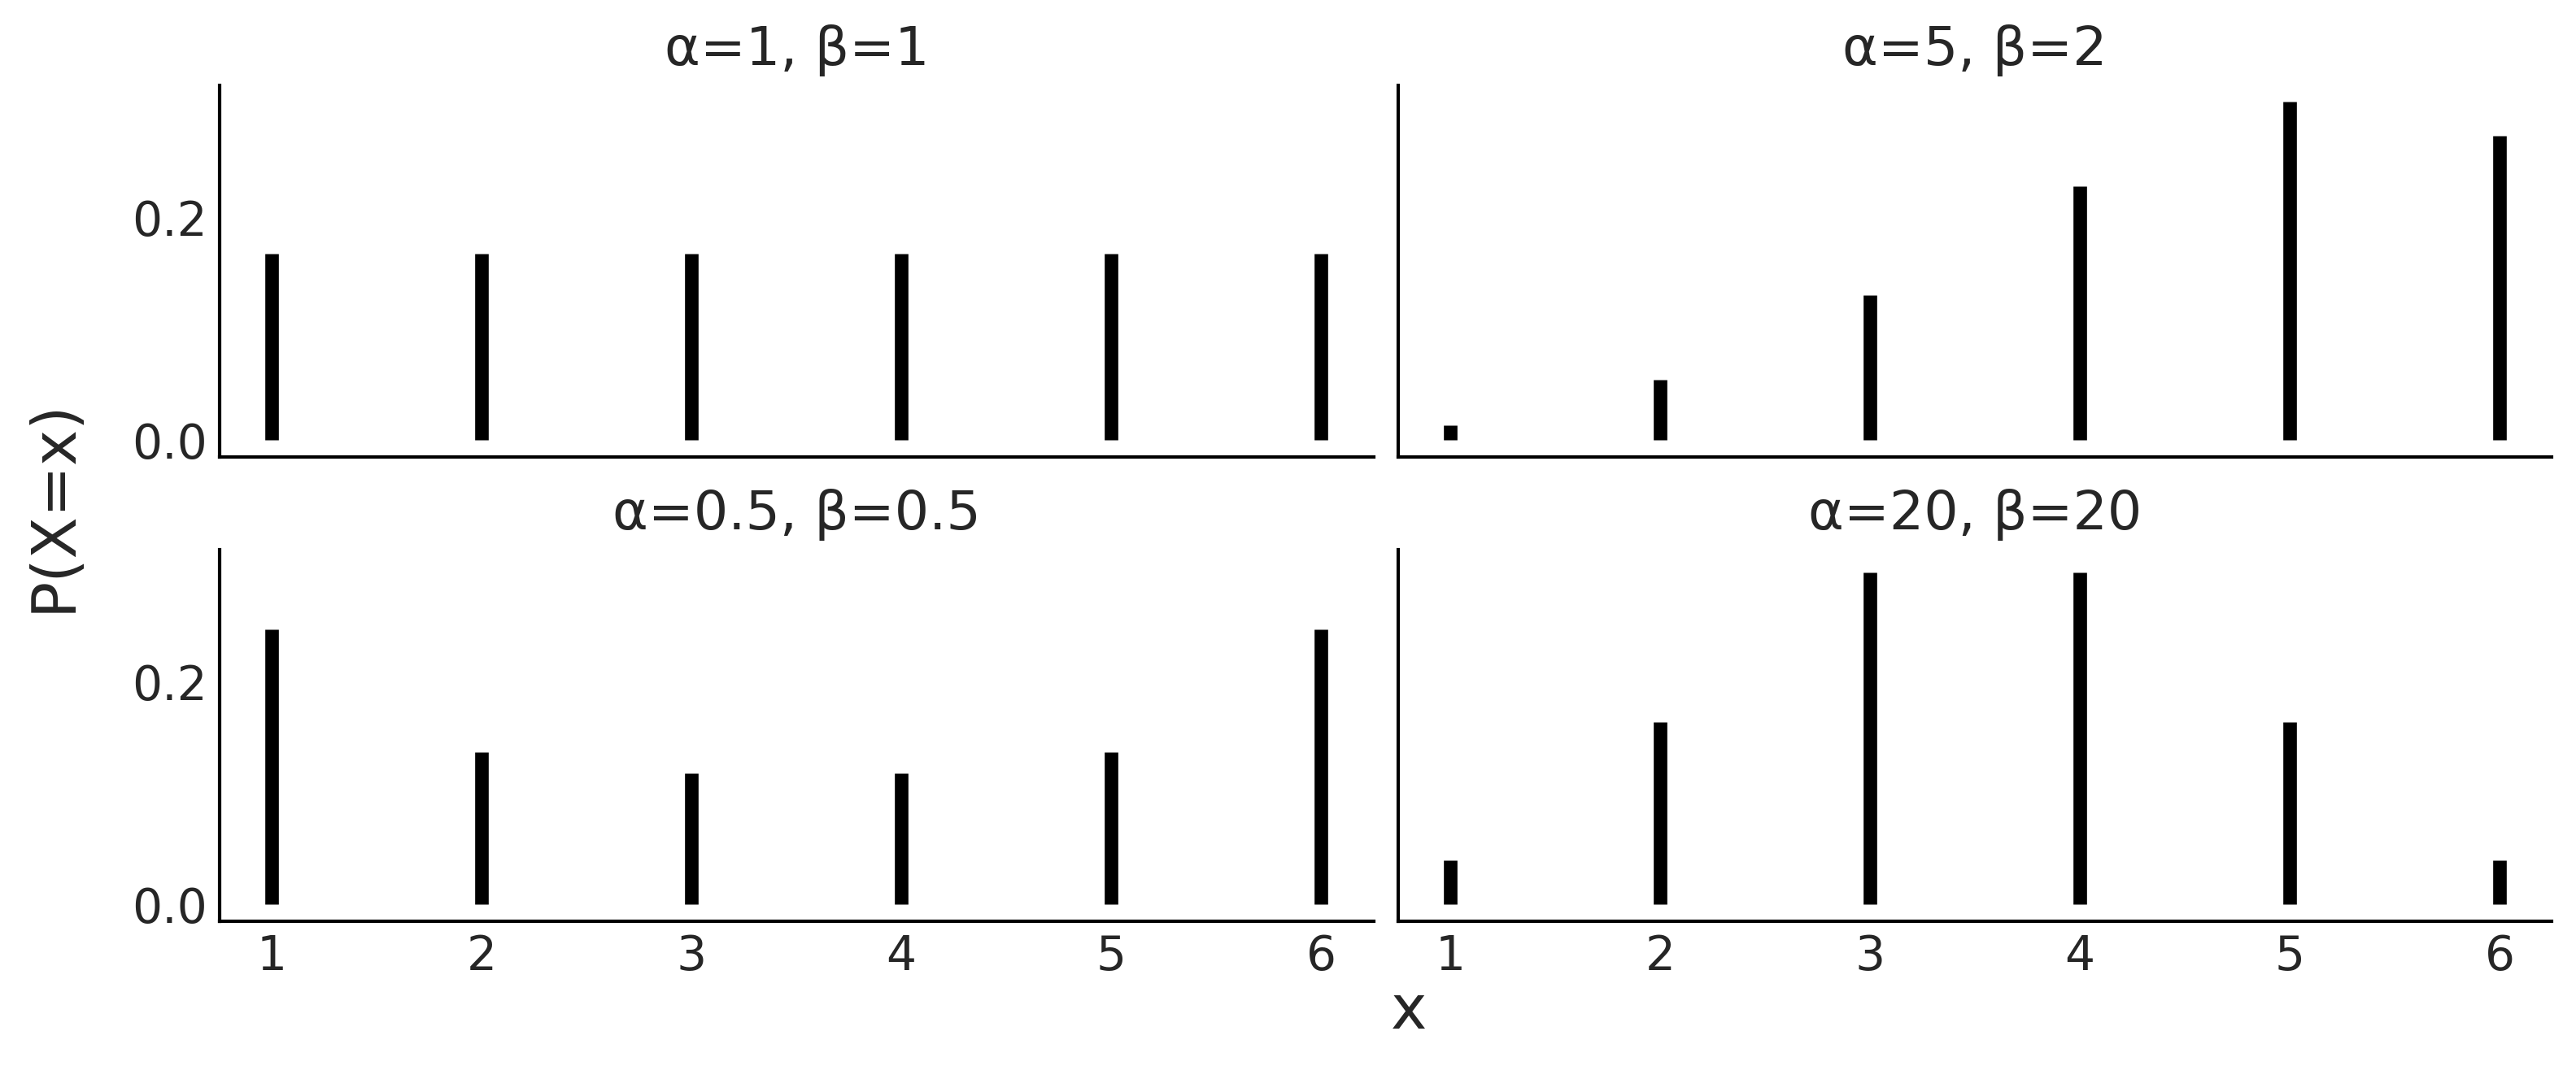

In [4]:
n = 5
x = np.arange(0, 6)

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharey=True, sharex=True)
axes = np.ravel(axes)

for ax, (α, β) in zip(axes, ((1, 1), (5, 2), (0.5, 0.5), (20, 20))): 
    dist_pmf = binom(n, x) * (beta(x+α, n-x+β) / beta(α, β))
    ax.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    ax.set_title(f"α={α}, β={β}")
    ax.set_xticks(x)
    ax.set_xticklabels(x+1)
fig.text(0.52, -0.04, "x", fontsize=18)
fig.text(-0.04, 0.4, "P(X=x)", fontsize=18, rotation="vertical")
plt.savefig("../fig/dice_distribution.png", bbox_inches='tight')

In [5]:
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_interactive(pointinterval=False)

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

In [6]:
pmfs = pz.BetaBinomial(alpha=10, beta=10, n=5).pdf(range(6))
[(i, f"{x:0.3f}") for i, x in enumerate(pmfs)]

[(0, '0.047'),
 (1, '0.168'),
 (2, '0.285'),
 (3, '0.285'),
 (4, '0.168'),
 (5, '0.047')]

In [7]:
pz.BetaBinomial(alpha=10, beta=10, n=6).rvs()

4

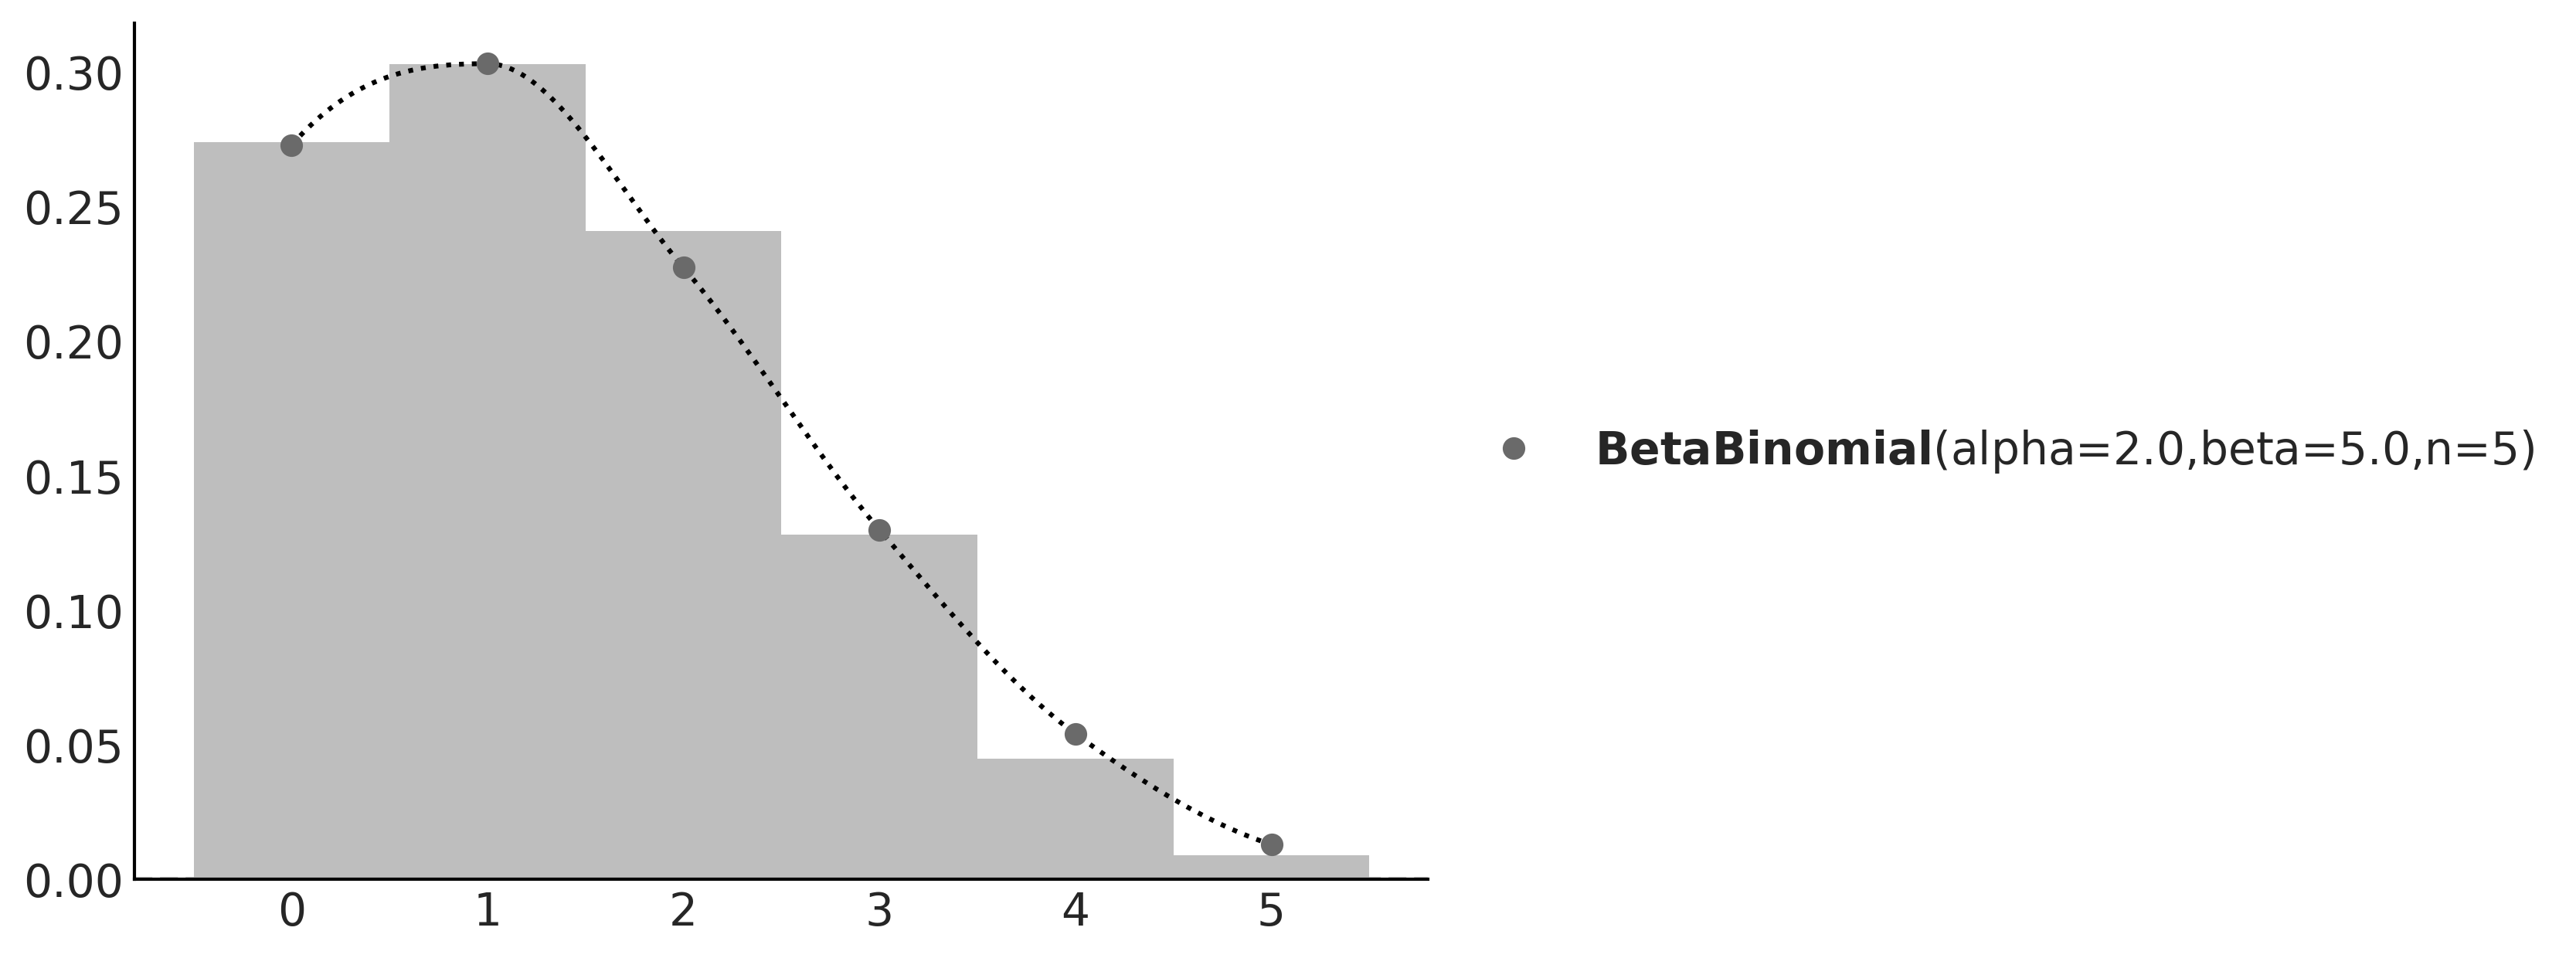

In [8]:
plt.hist(pz.BetaBinomial(alpha=2, beta=5, n=5).rvs(1000),
         bins=[0, 1, 2, 3, 4, 5, 6], density=True, align="left", color="C2")
pz.BetaBinomial(alpha=2, beta=5, n=5).plot_pdf();
plt.savefig("../fig/beta_binomial_sampling.png")

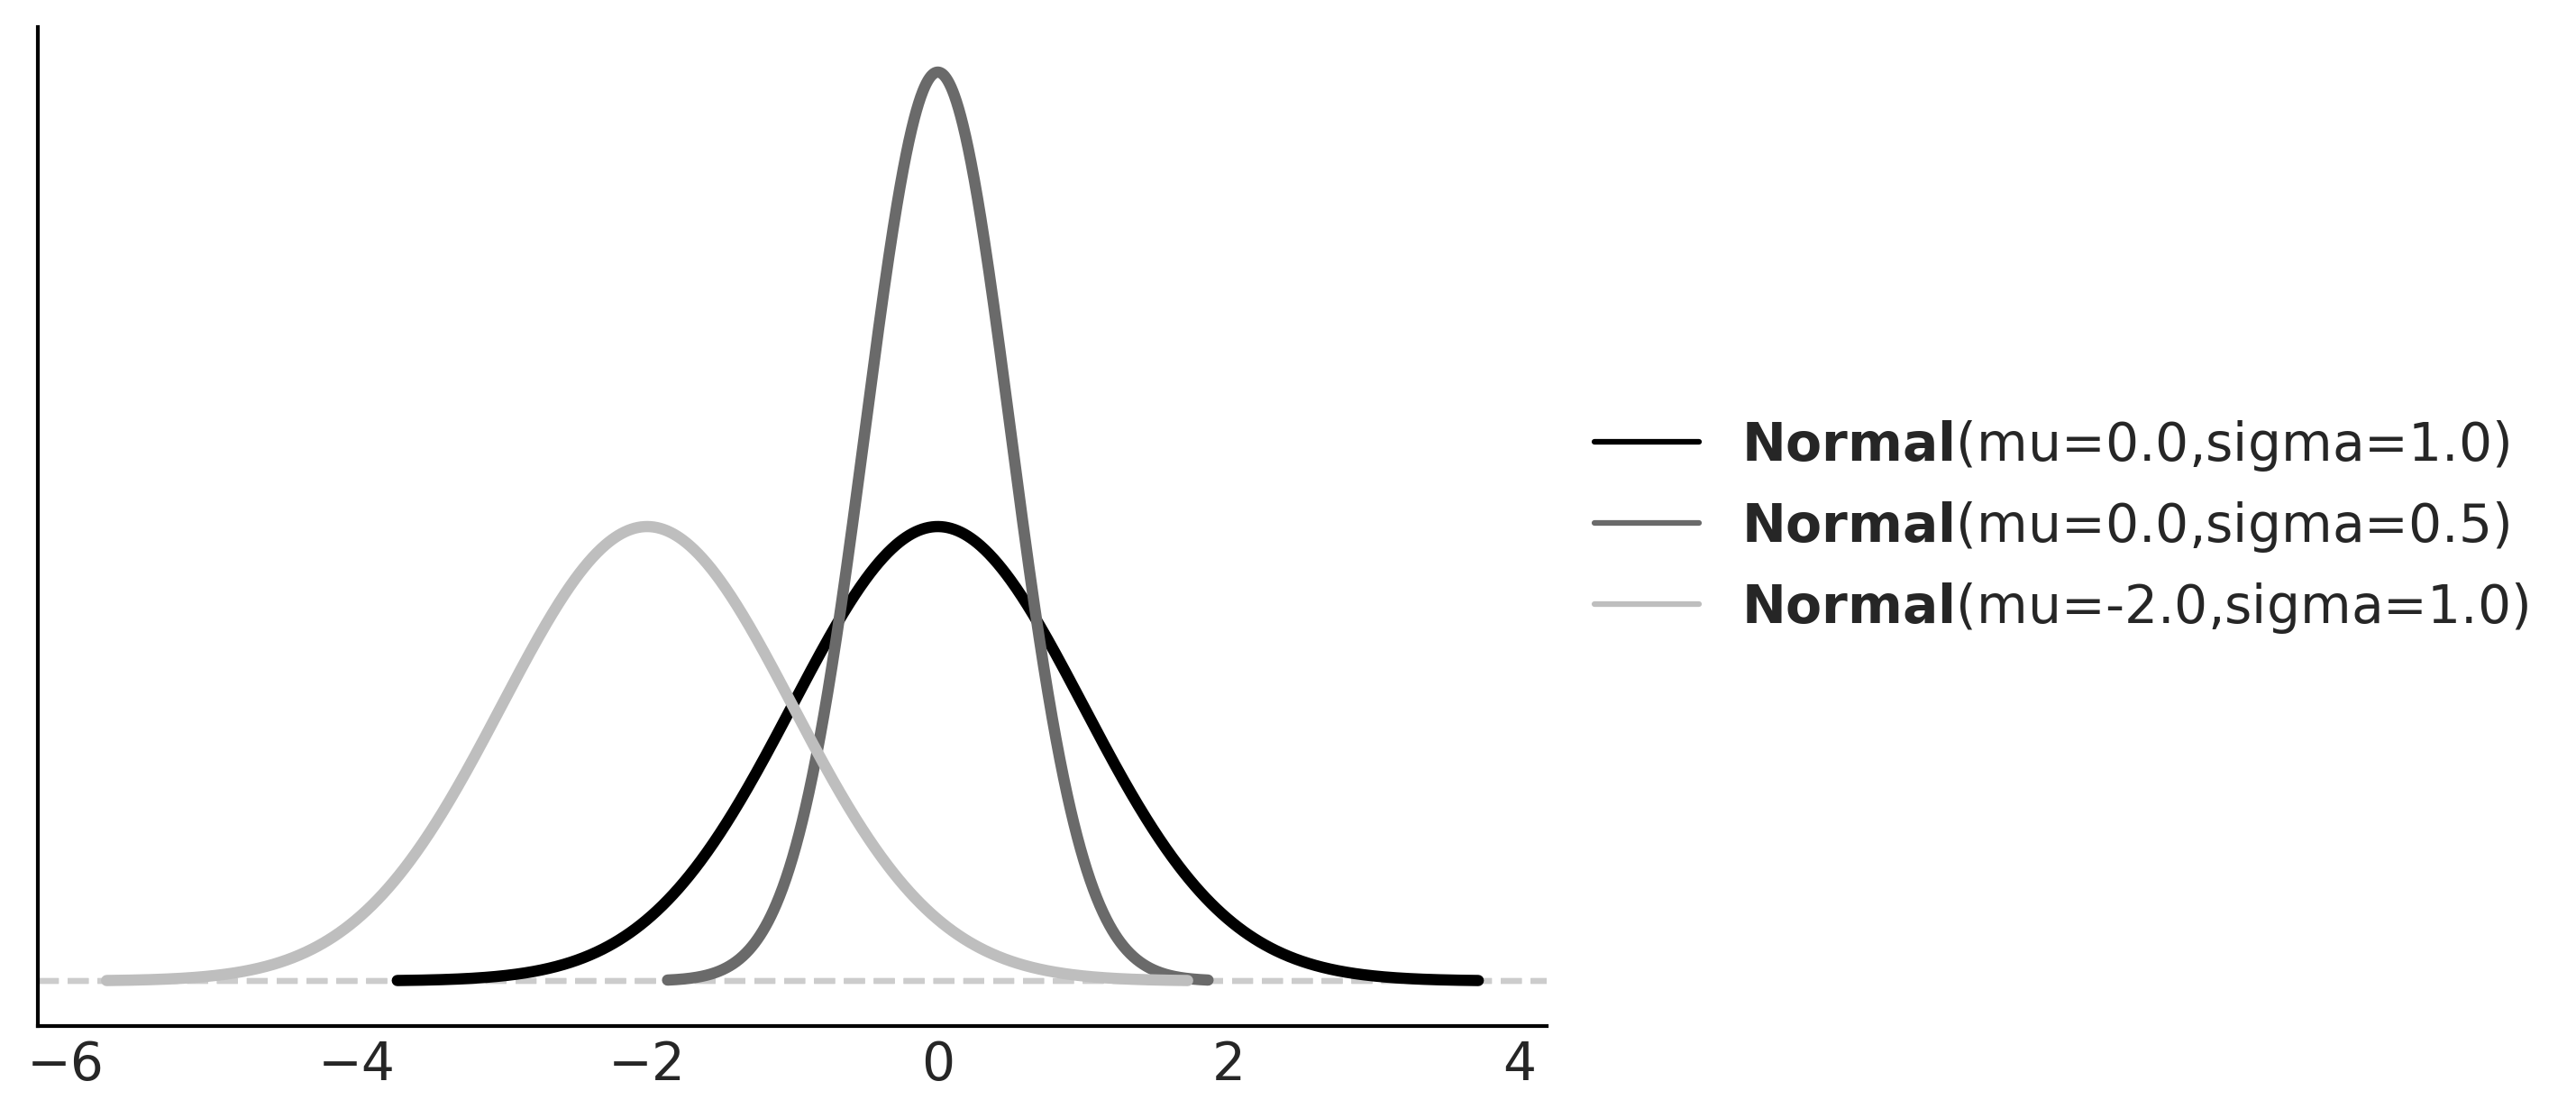

In [9]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]
plt.savefig("../fig/gaussian_pdf.png")

0.4772498680518208

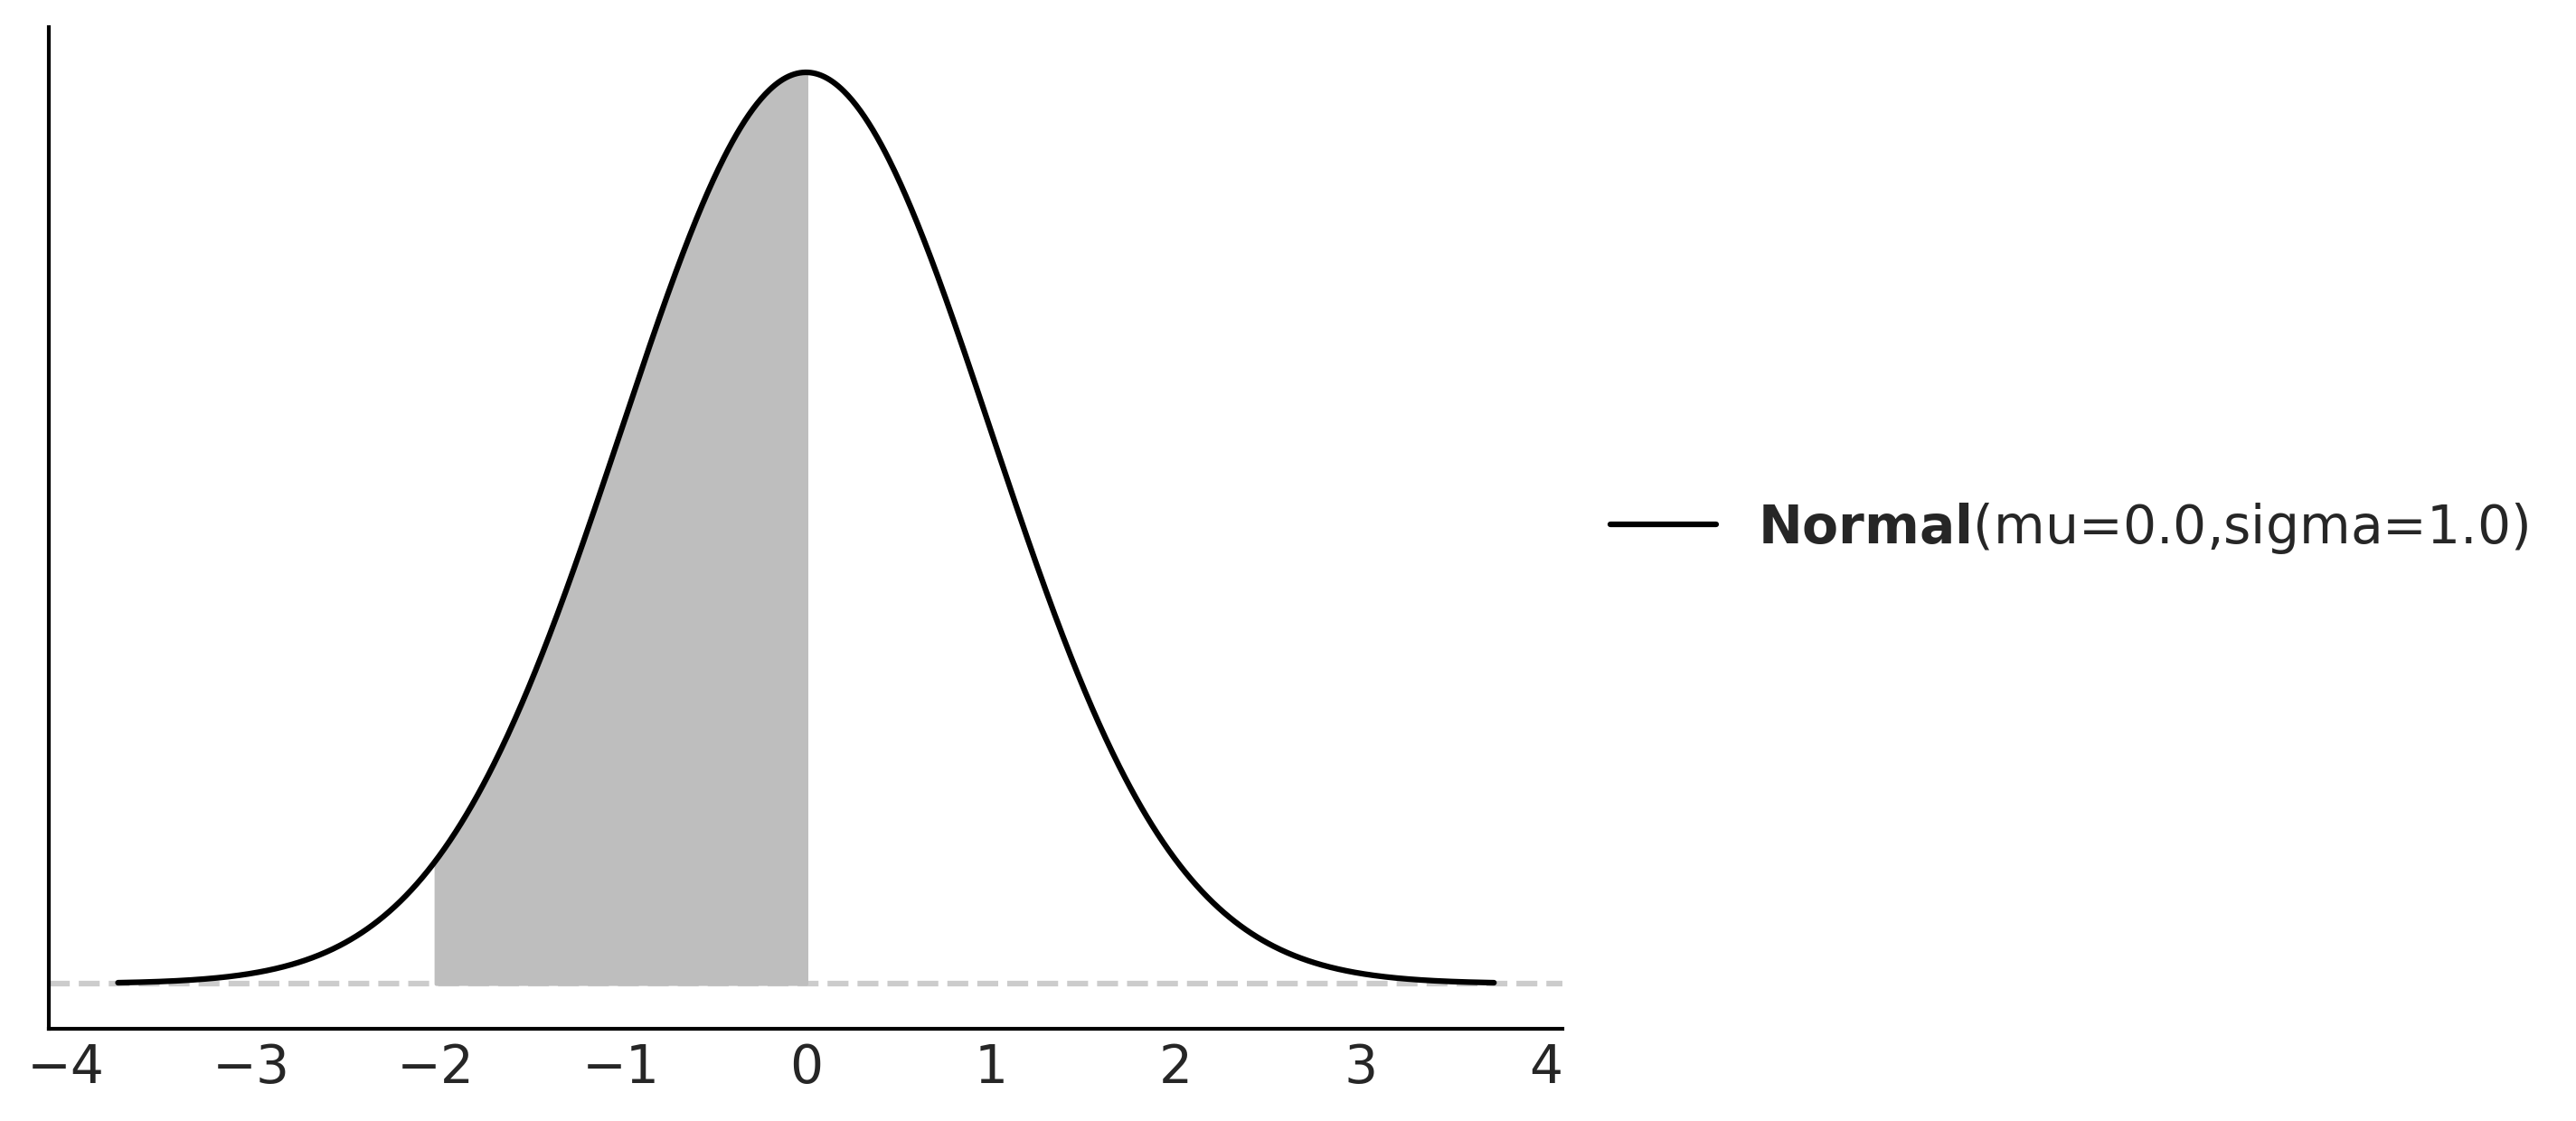

In [10]:
dist = pz.Normal(0, 1)
ax = dist.plot_pdf()
x_s = np.linspace(-2, 0)
ax.fill_between(x_s, dist.pdf(x_s), color="C2")
plt.savefig("../fig/gauss_prob.png")
dist.cdf(0) - dist.cdf(-2)

In [11]:
dist = pz.Normal(0, 1)
a = -2
b = 0
num = 10
x_s = np.linspace(a, b, num)
base = (b-a)/num
np.sum(dist.pdf(x_s) * base)

0.4744186055196588

In [12]:
dist.pdf(0.5), dist.pdf(0.4)

(0.35206532676429947, 0.36827014030332333)

In [13]:
values = dist.rvs(1000000)
np.mean([(0.4  > values)  & (values < 0.6)]), np.mean([(0.3  > values)  & (values < 0.5)])

(0.655629, 0.618366)

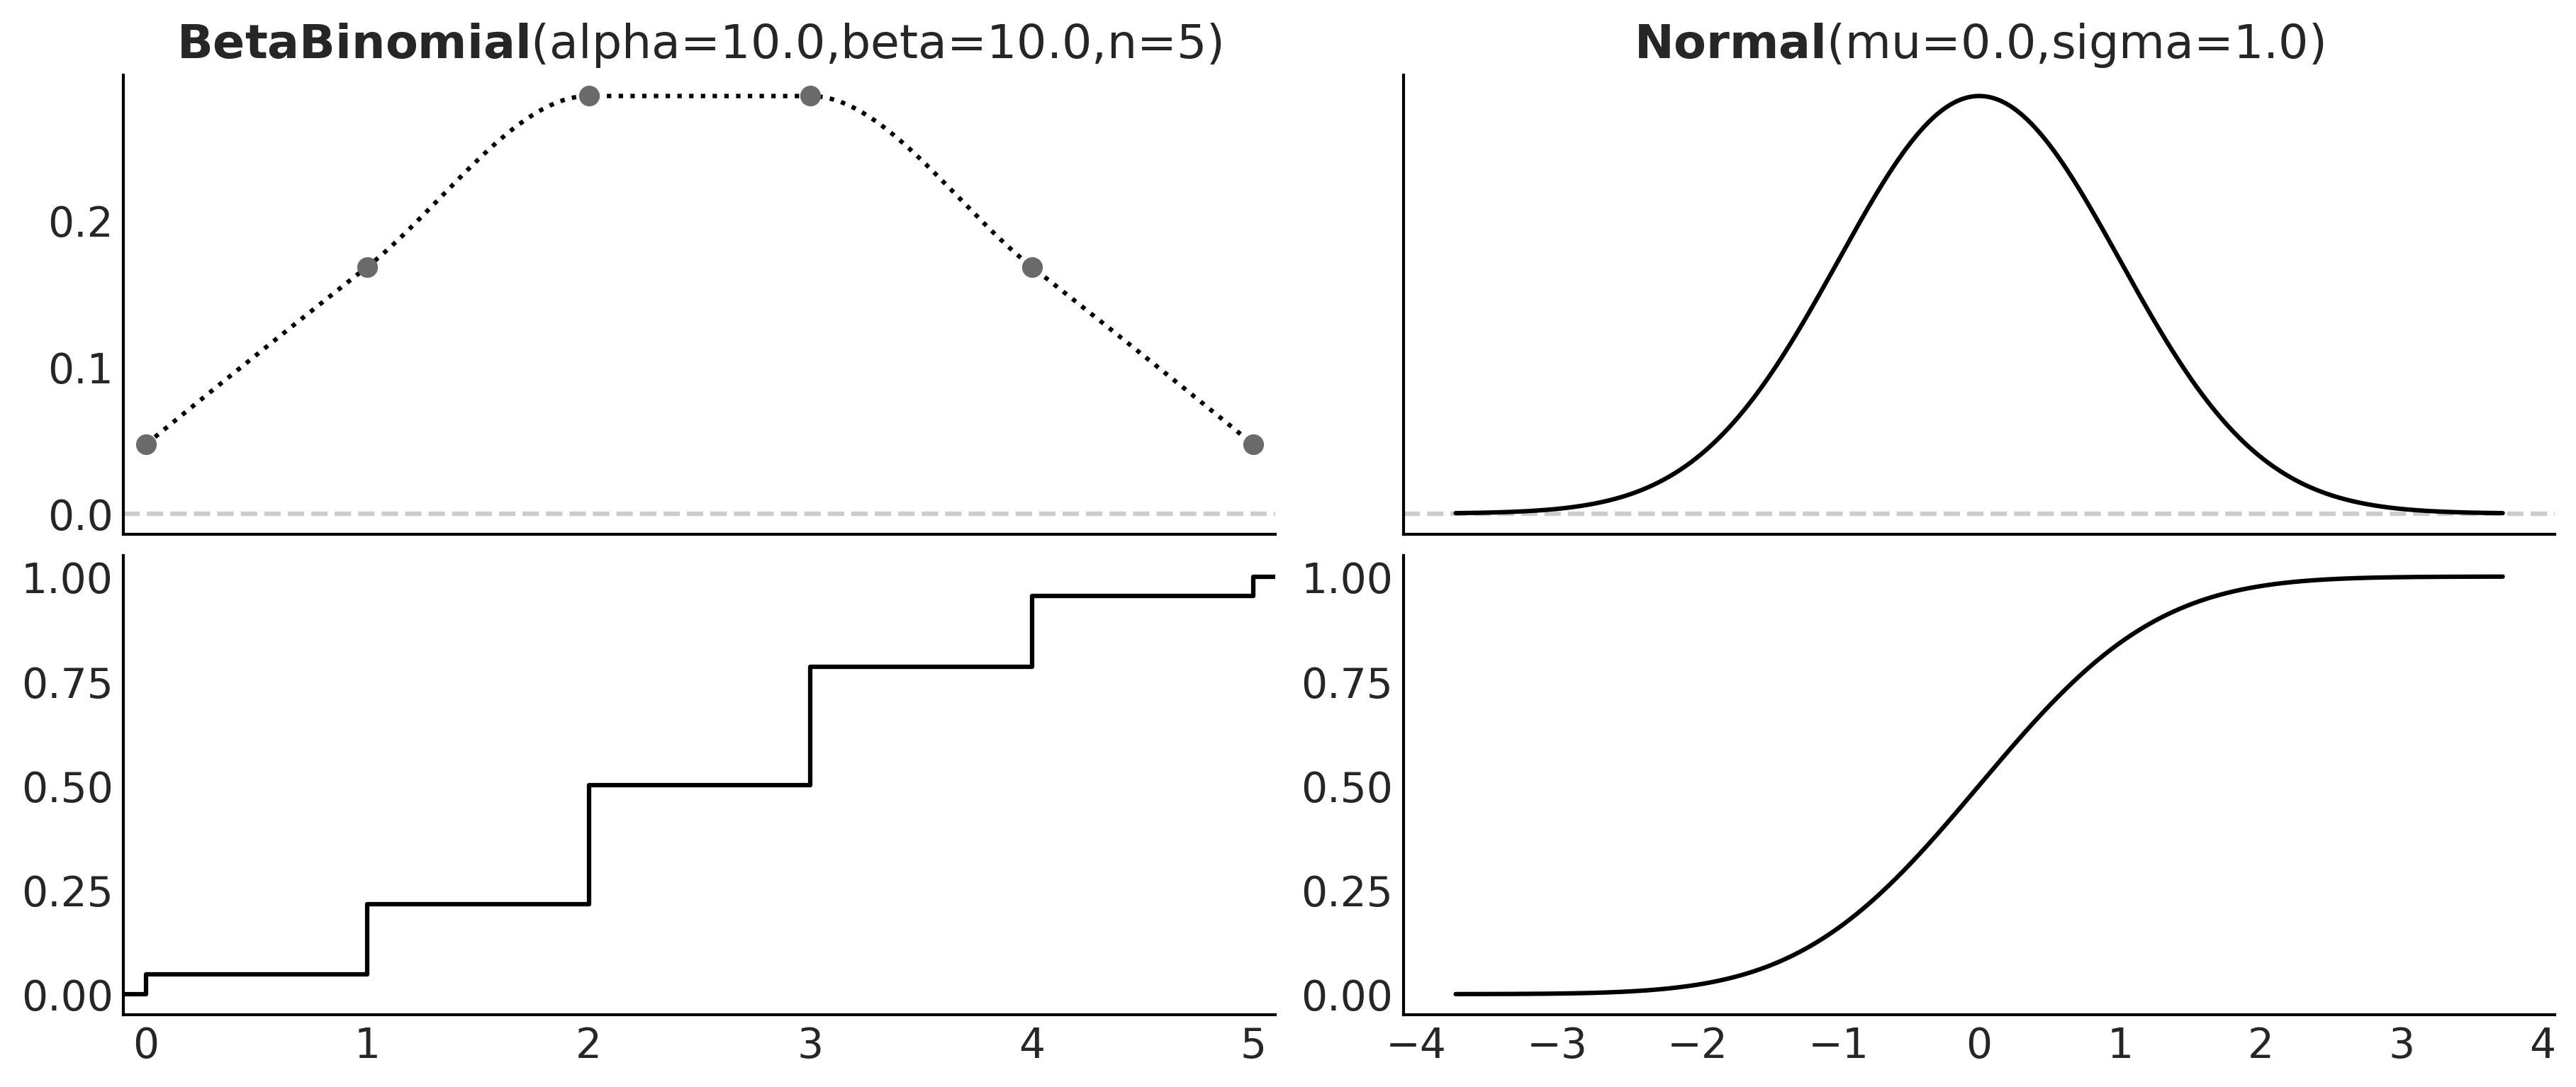

In [14]:
_, ax = plt.subplots(2, 2, figsize=(12, 5), sharex="col")
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_pdf(ax=ax[0, 0], legend="title")
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_cdf(ax=ax[1, 0], legend=None)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 1], legend="title")
pz.Normal(0, 1).plot_cdf(ax=ax[1, 1], legend=None)
plt.savefig("../fig/cdf_pdf.png", bbox_inches='tight')

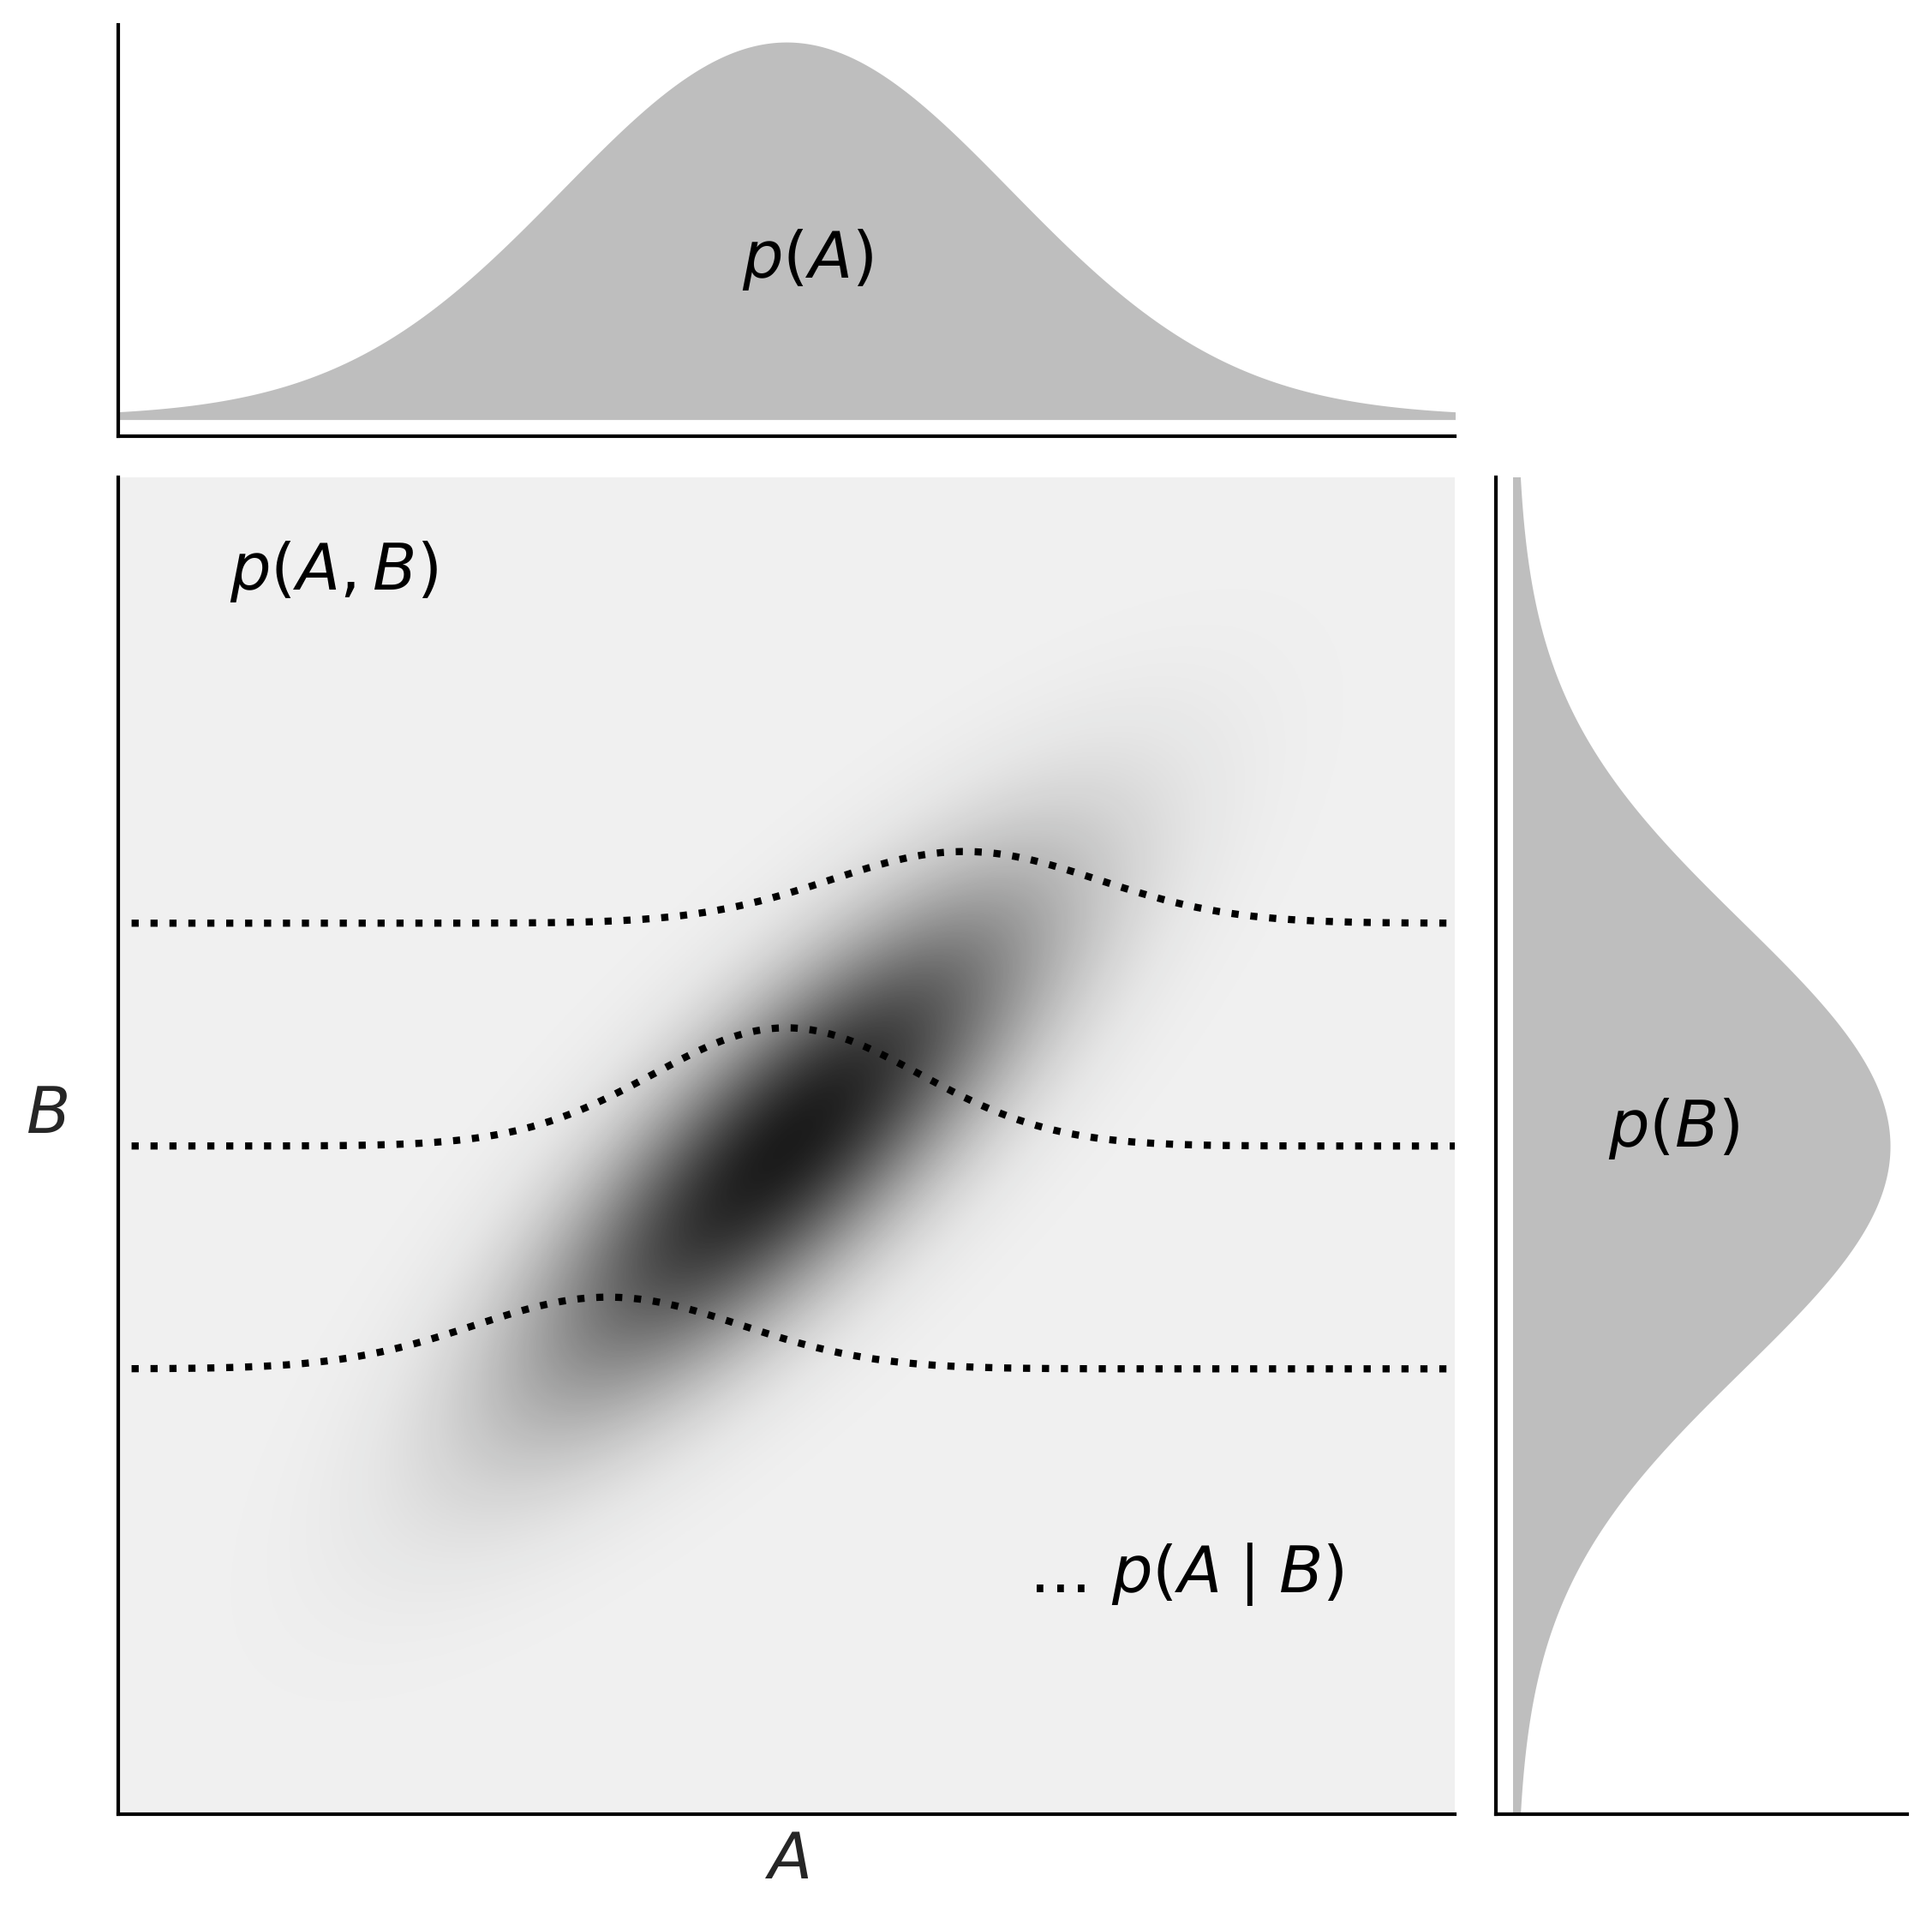

In [15]:
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = pz.MvNormal([0, 0], [[1, 0.8], 
                          [0.8, 1]])

x_value = pos[:, :, 0][:,0]
x_density = rv.pdf(pos)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


_, axes_arr = plt.subplots(1, 3, figsize=(8, 8))

ax_joint, ax_x, ax_y = axes_arr
ax_joint.set_position(rect_scatter)
ax_x.set_position(rect_histx)
ax_y.set_position(rect_histy)

ax_joint.imshow(x_density, cmap='cet_gray_r', origin='lower', extent=[-3, 3, -3, 3])

ax_joint.plot(x_value, x_density[400]*2, 'k:', lw=2)
ax_joint.plot(x_value, x_density[500]*2+1, 'k:', lw=2)
ax_joint.plot(x_value, x_density[300]*2-1, 'k:', lw=2)

ax_x.fill_between(x_value, x_density.sum(1), color='C2')
ax_y.fill_betweenx(x_value, x_density.sum(1), color='C2')


for ax in [ax_joint, ax_x, ax_y]:
    ax.grid(False)
    ax.set_facecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])
ax_joint.set_xlim(-3, 3)
ax_joint.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_y.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_joint.set_ylabel('$B$', rotation=0, labelpad=20, fontsize=18)
ax_joint.set_xlabel('$A$', fontsize=18)

ax_joint.text(-2.5, 2.5, '$p(A, B)$', fontsize=18, color='k', weight='medium')
ax_y.text(10, 0, '$p(B)$', fontsize=18, color='k', weight='medium')
ax_x.text(-0.2, 15, '$p(A)$', fontsize=18, color='k', weight='medium')
ax_joint.text(1, -2, ' ... $p(A \mid B)$', fontsize=18, color='k', weight='medium')
plt.savefig('../fig/joint_marginal_cond.png')

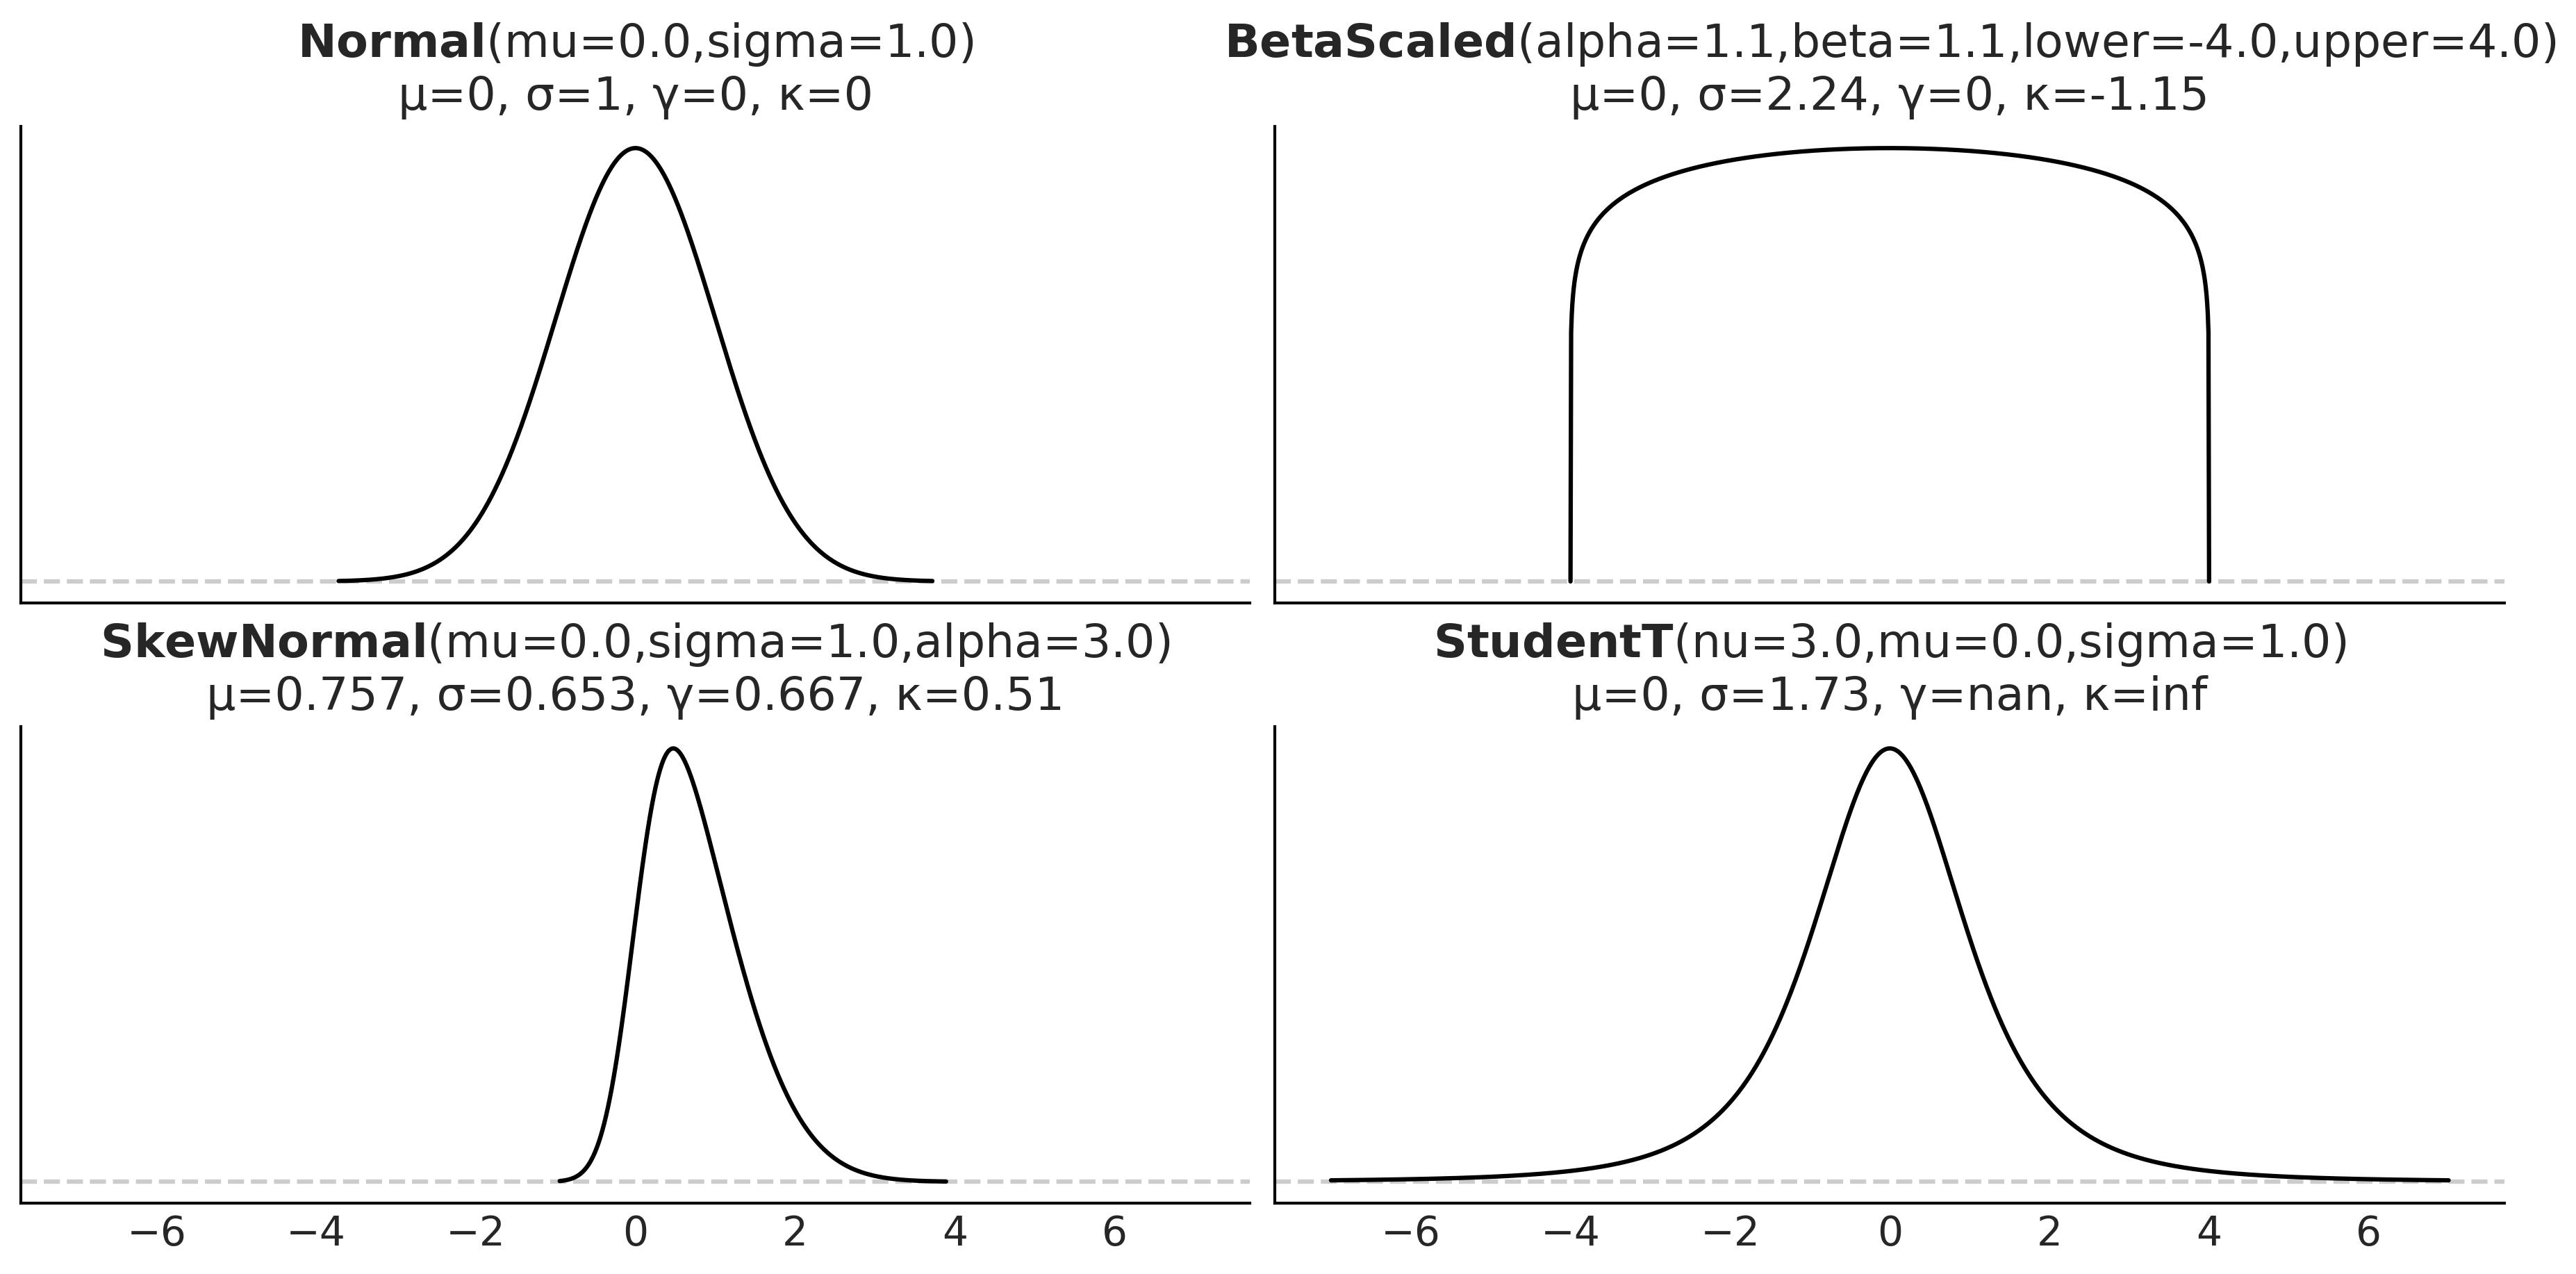

In [16]:
_, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 0], moments=["m", "d", "s", "k"], legend="title")
pz.BetaScaled(1.1, 1.1, -4, 4).plot_pdf(ax=ax[0, 1], moments=["m", "d", "s", "k"], legend="title")
pz.SkewNormal(0, 1, 3).plot_pdf(ax=ax[1, 0], moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(3, 0, 1).plot_pdf(ax=ax[1, 1], moments=["m", "d", "s", "k"], legend="title", support=(-7, 7))
plt.savefig("../fig/moments.png", bbox_inches='tight')

<Axes: >

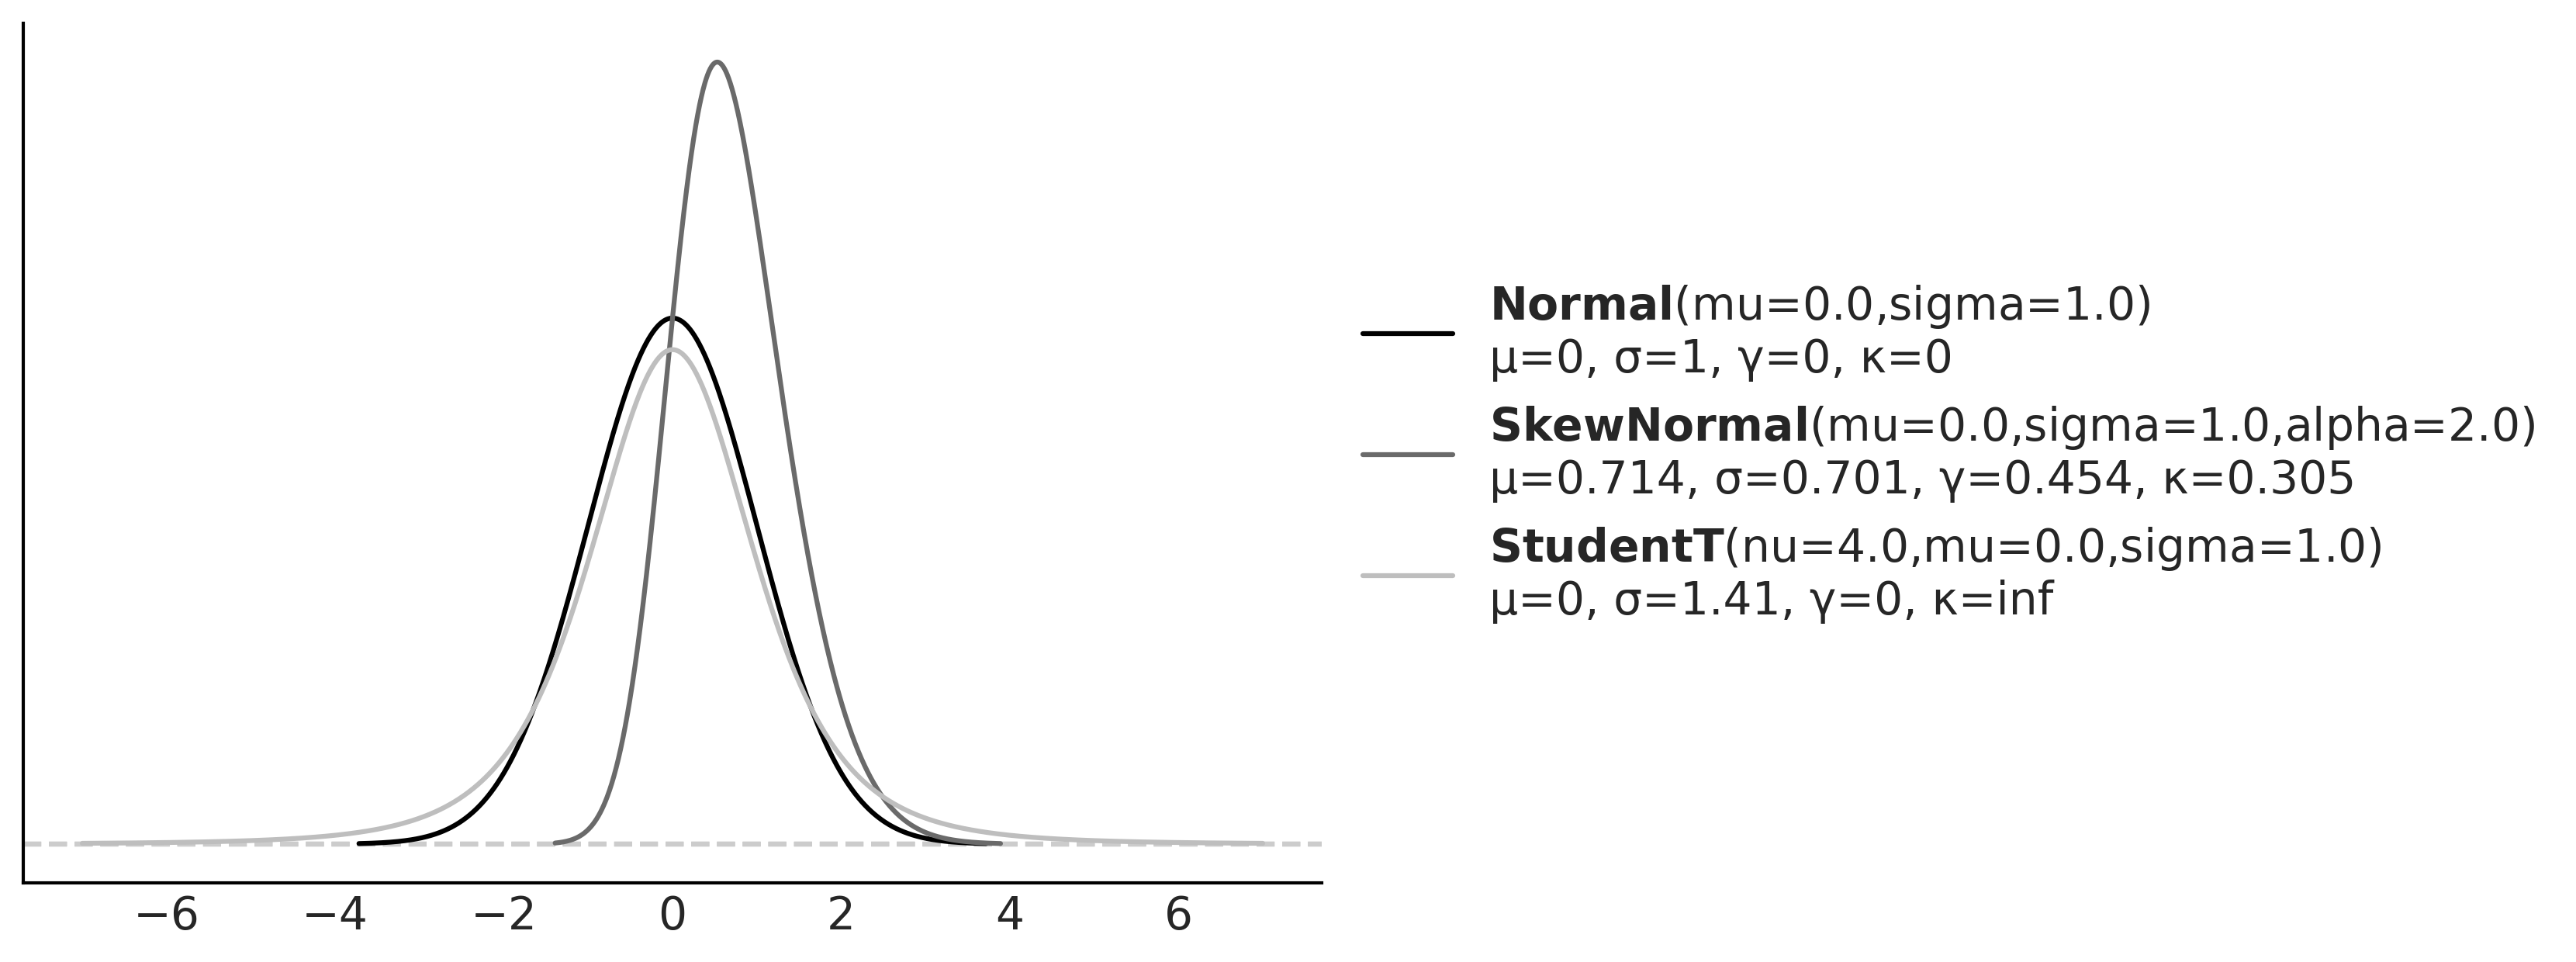

In [17]:
pz.Normal(0, 1).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0, 1, 2).plot_pdf(moments=["m", "d", "s", "k"])
pz.StudentT(4, 0, 1).plot_pdf(moments=["m", "d", "s", "k"], support=(-7, 7))

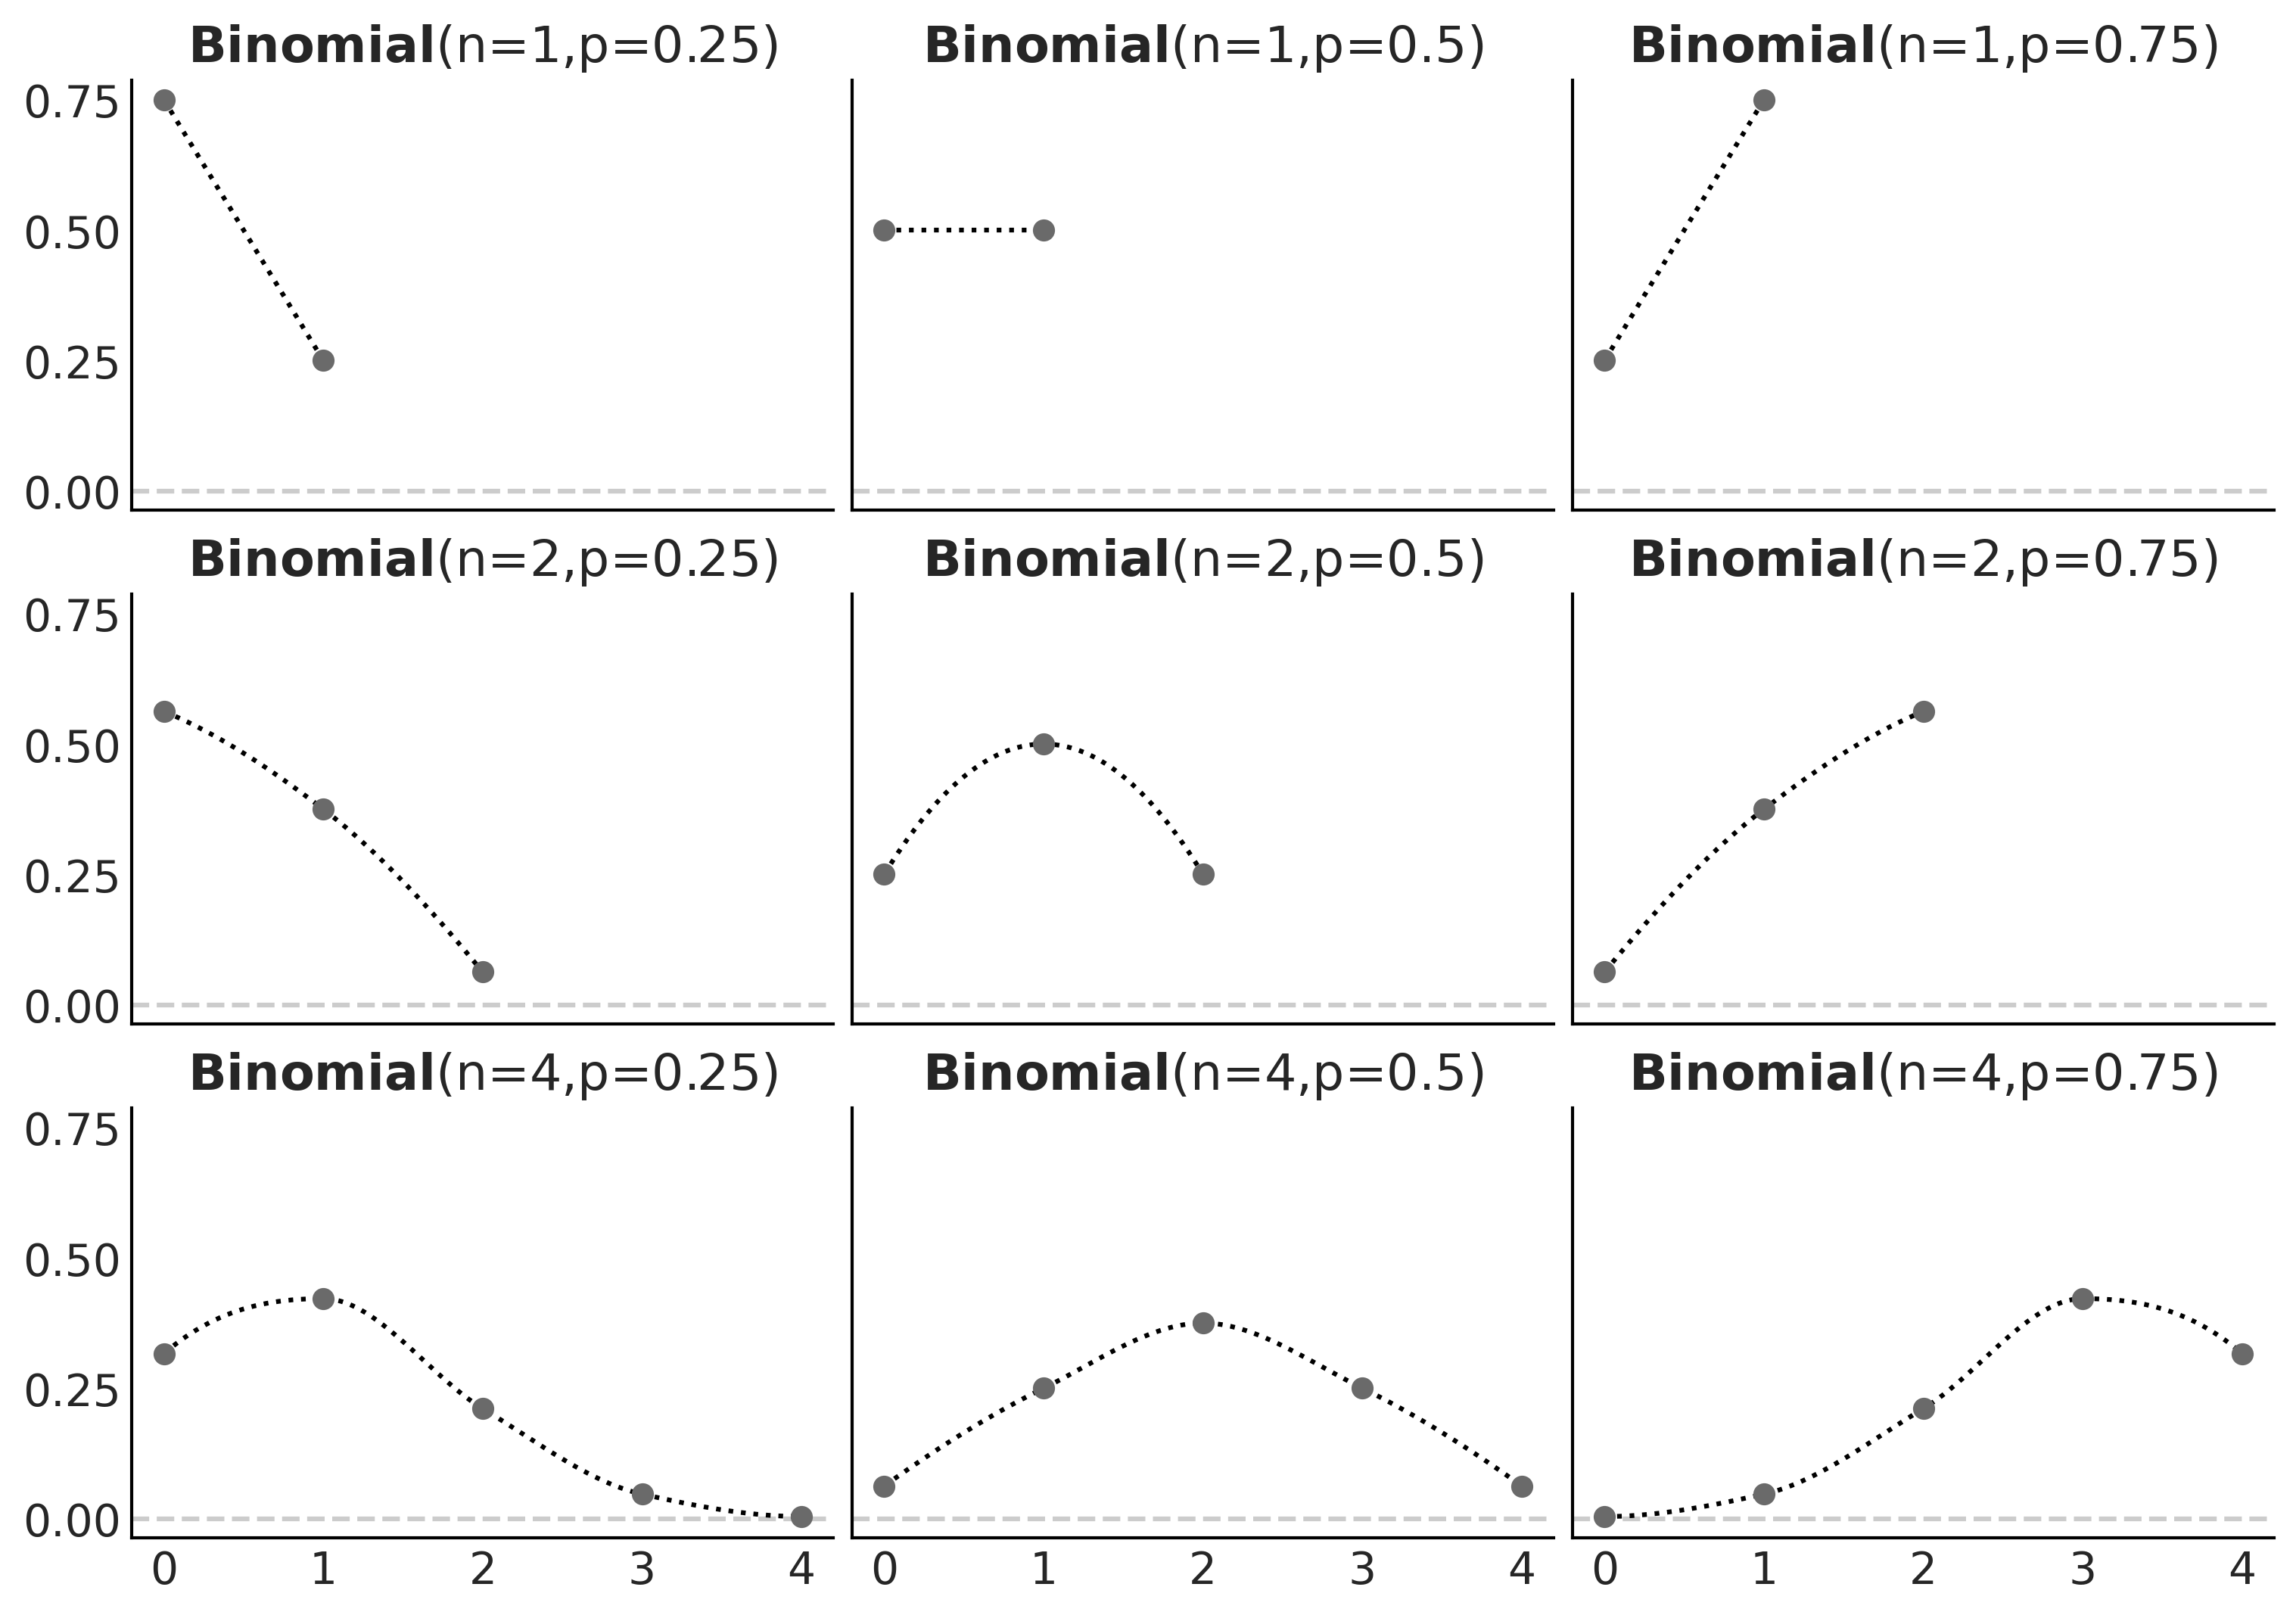

In [18]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, n in enumerate(n_params):
    for j, p in enumerate(p_params):
        pz.Binomial(n, p).plot_pdf(legend="title", ax=axes[i, j])
plt.savefig("../fig/binomial_distribution.png")

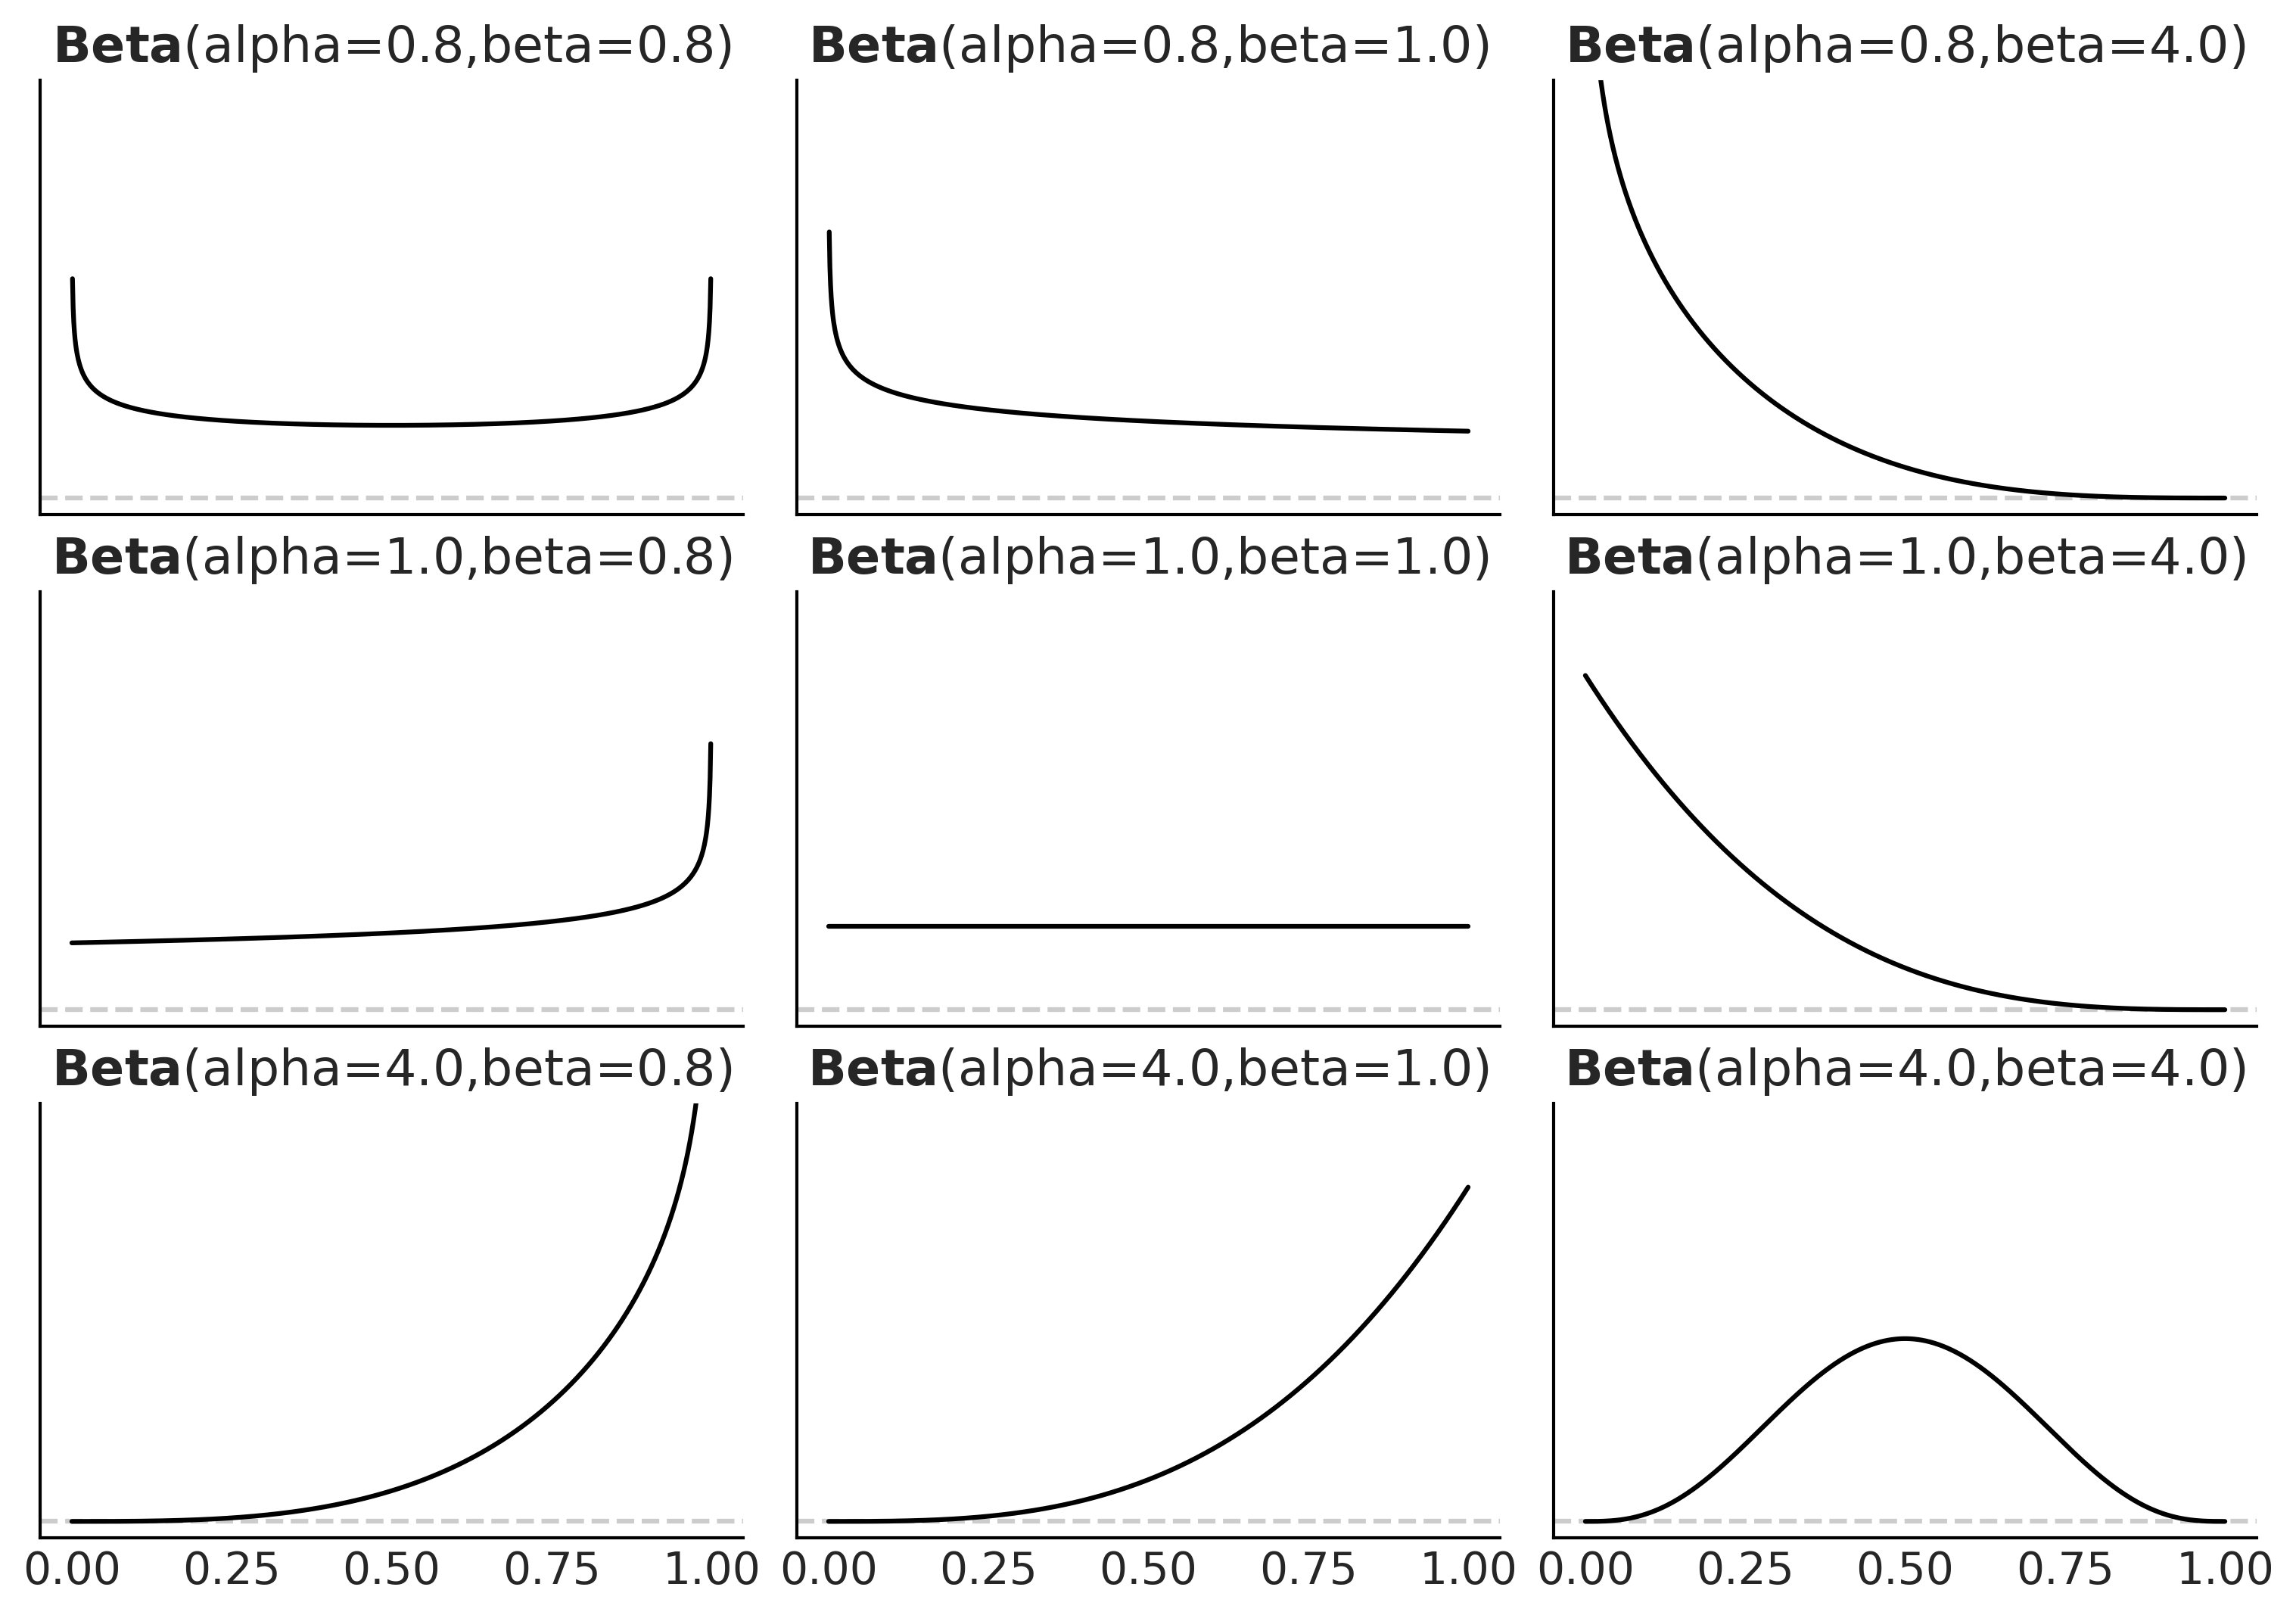

In [19]:
params = [0.8, 1, 4]

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, alpha in enumerate(params):
    for j, beta in enumerate(params):
        pz.Beta(alpha, beta).plot_pdf(legend="title", ax=axes[i, j])
axes[0][0].set_ylim(-0.2, 5)
plt.savefig("../fig/beta_distribution.png")

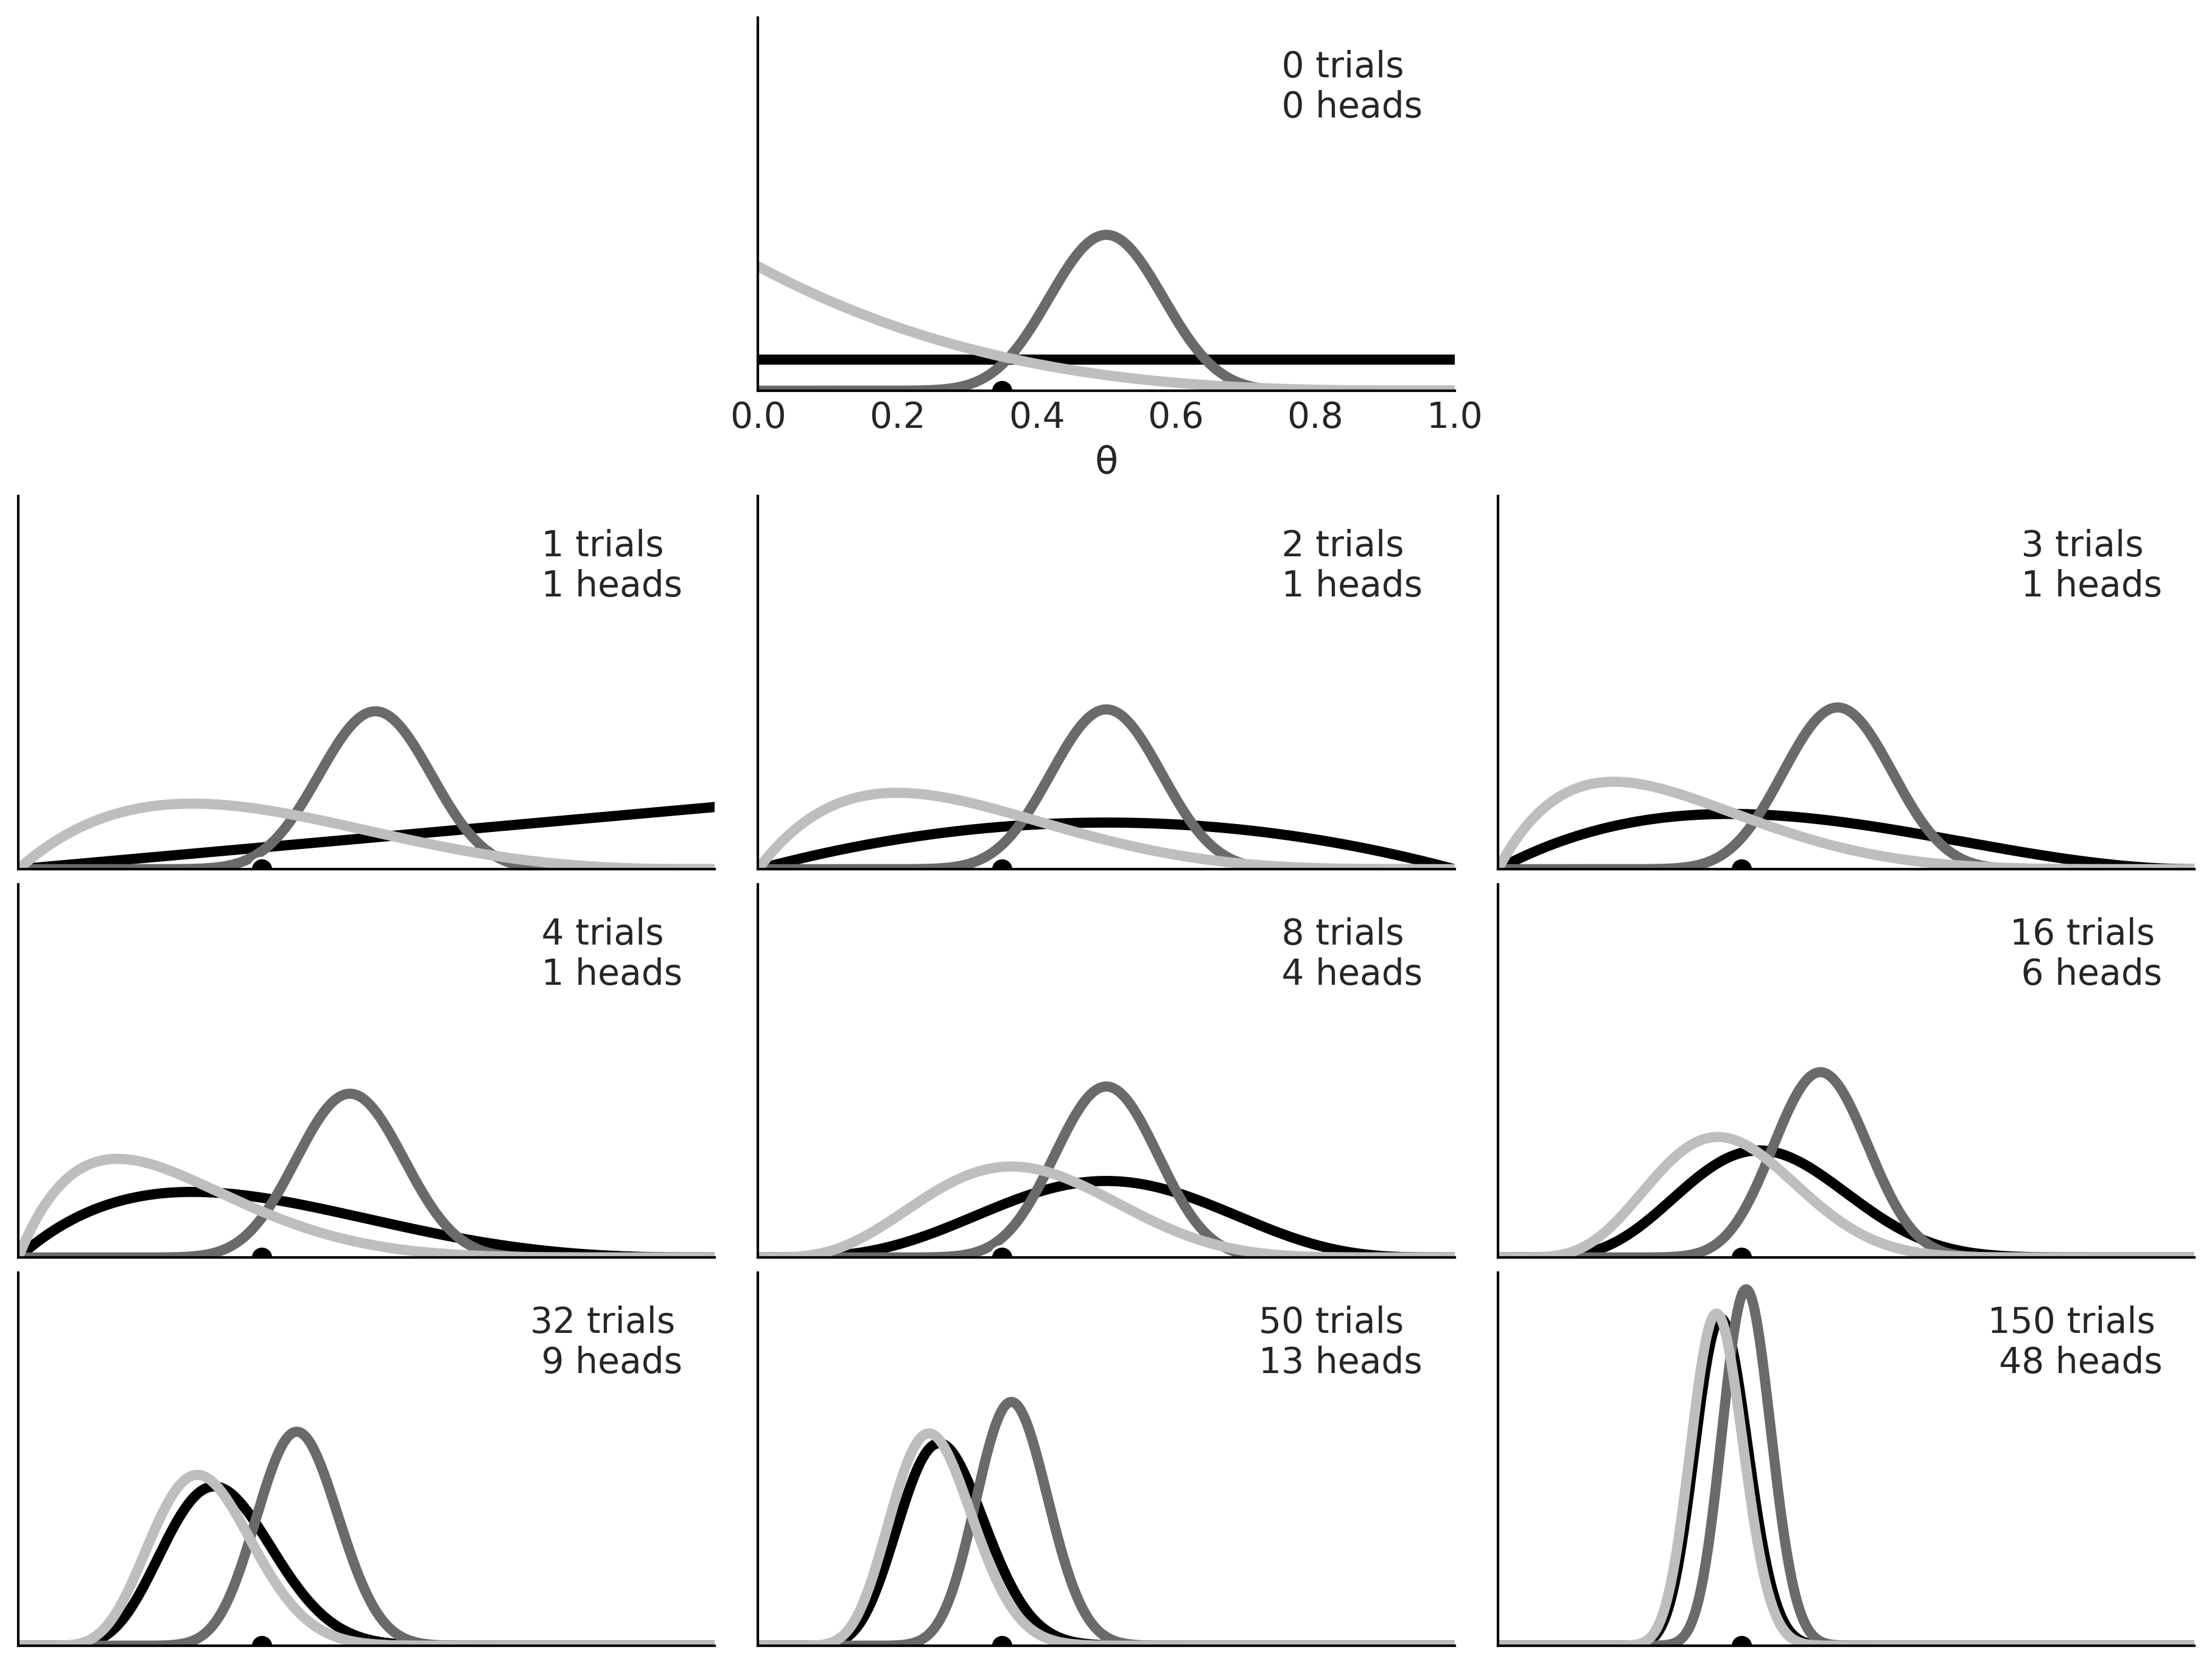

In [20]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

plt.savefig("../fig/beta_binomial_posterior.png")

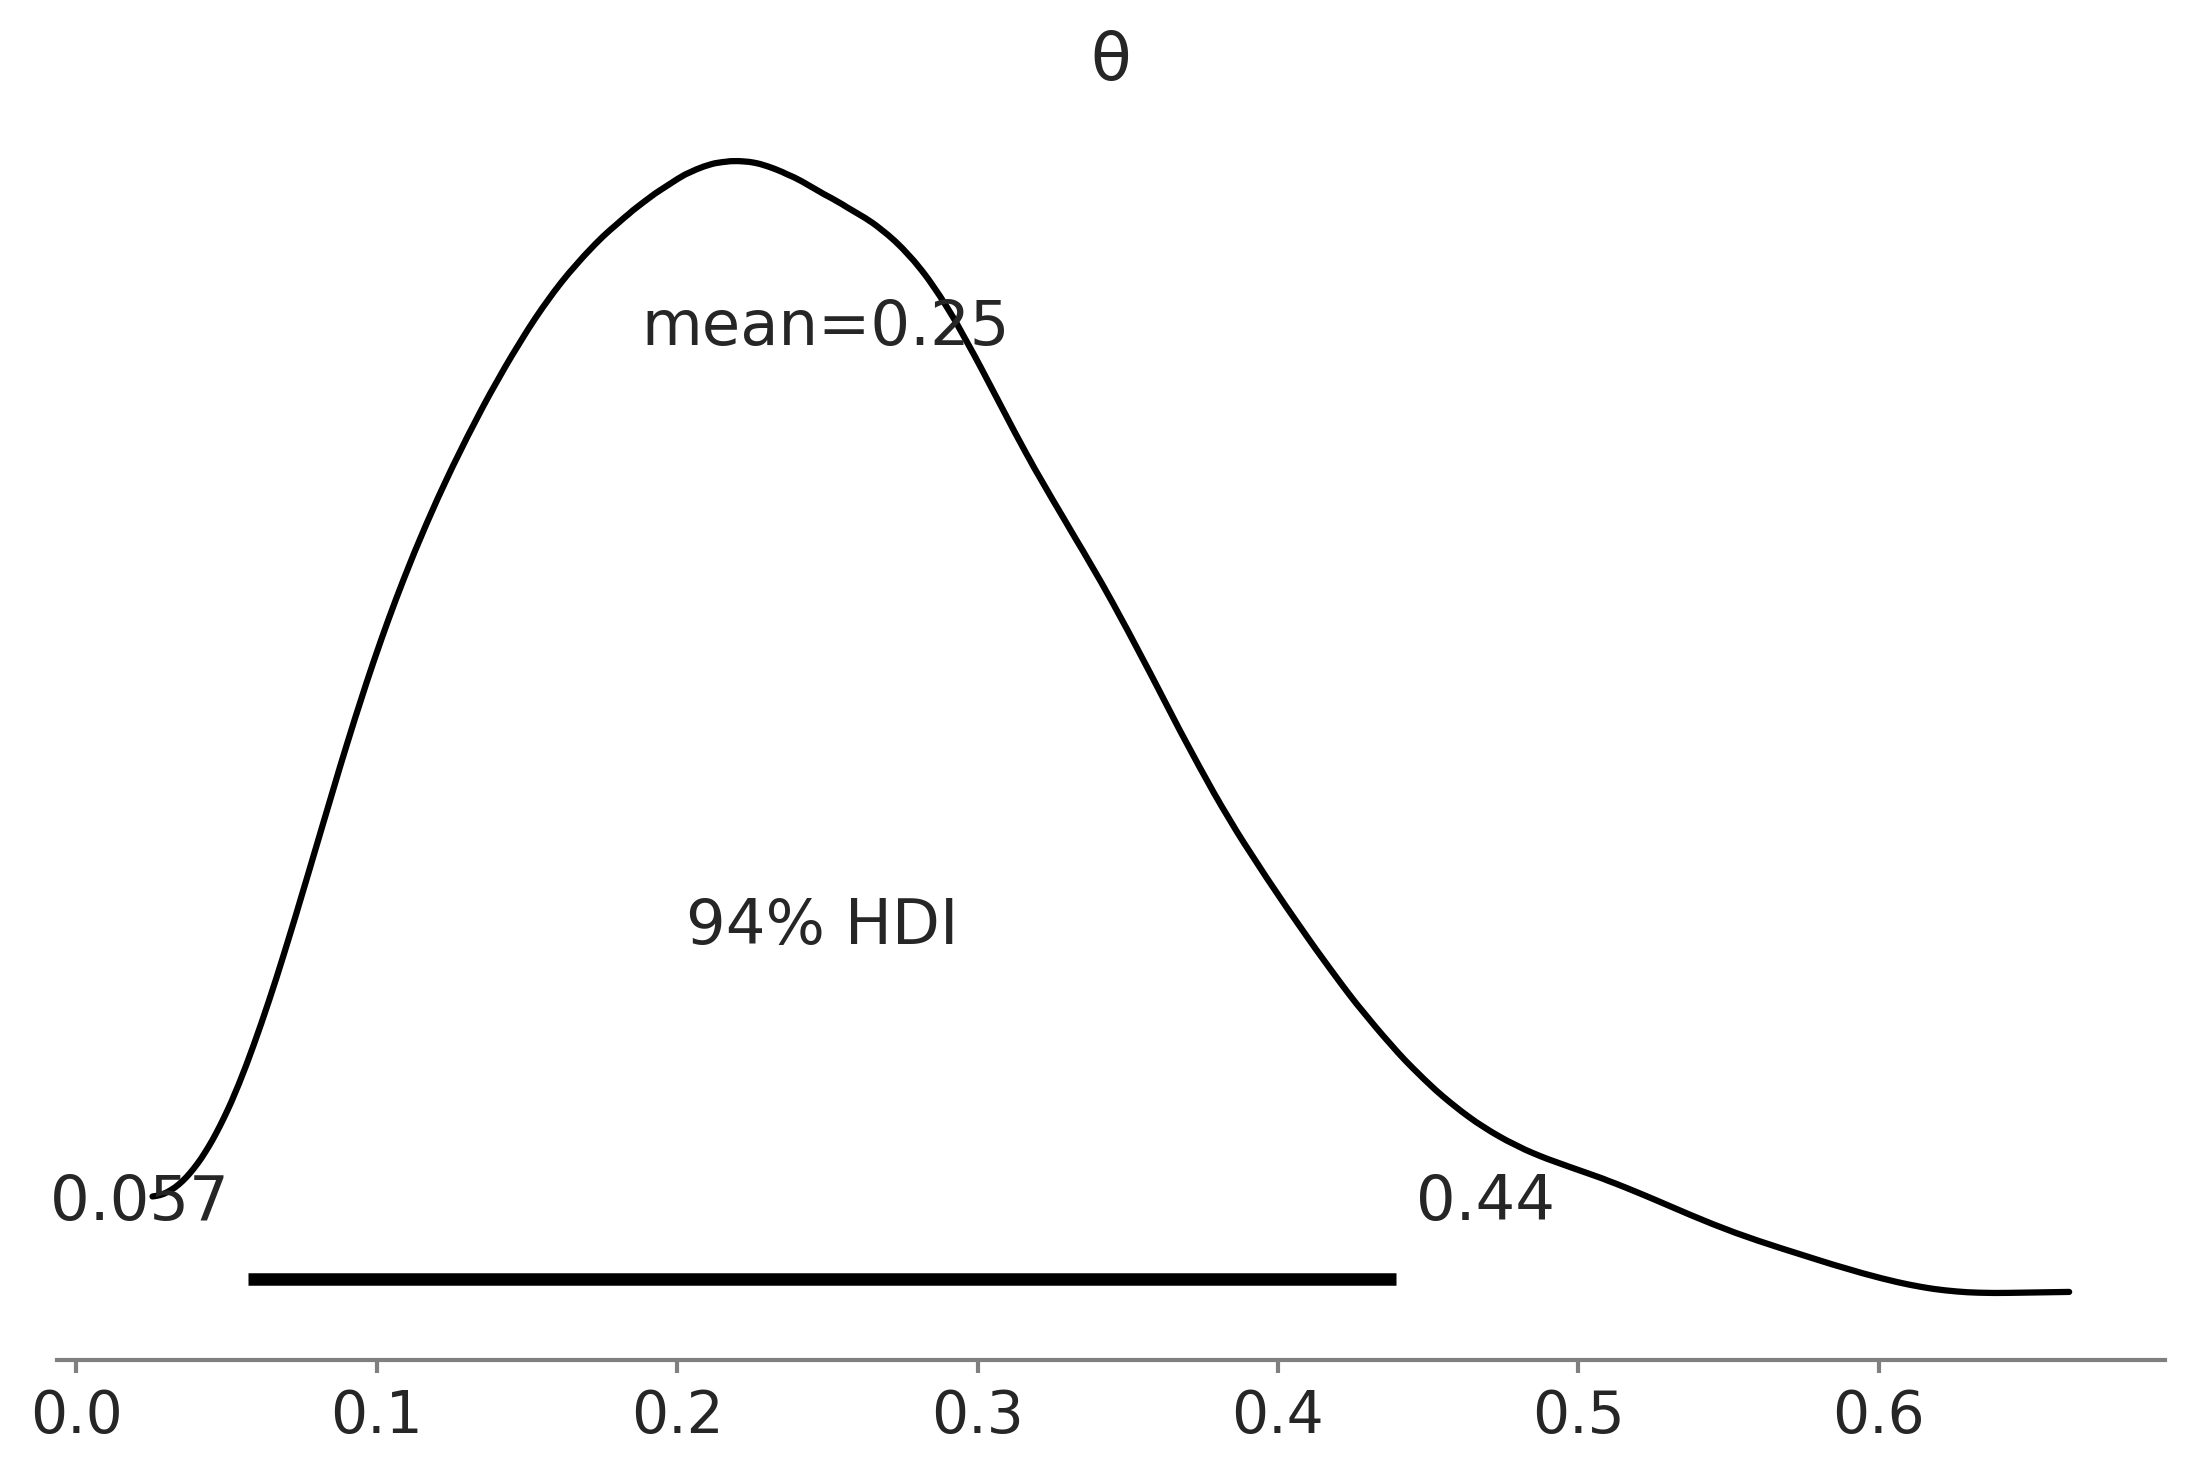

In [21]:
np.random.seed(1)
az.plot_posterior({'θ':pz.Beta(4, 12).rvs(1000)})

plt.savefig("../fig/plot_posterior_beta.png")

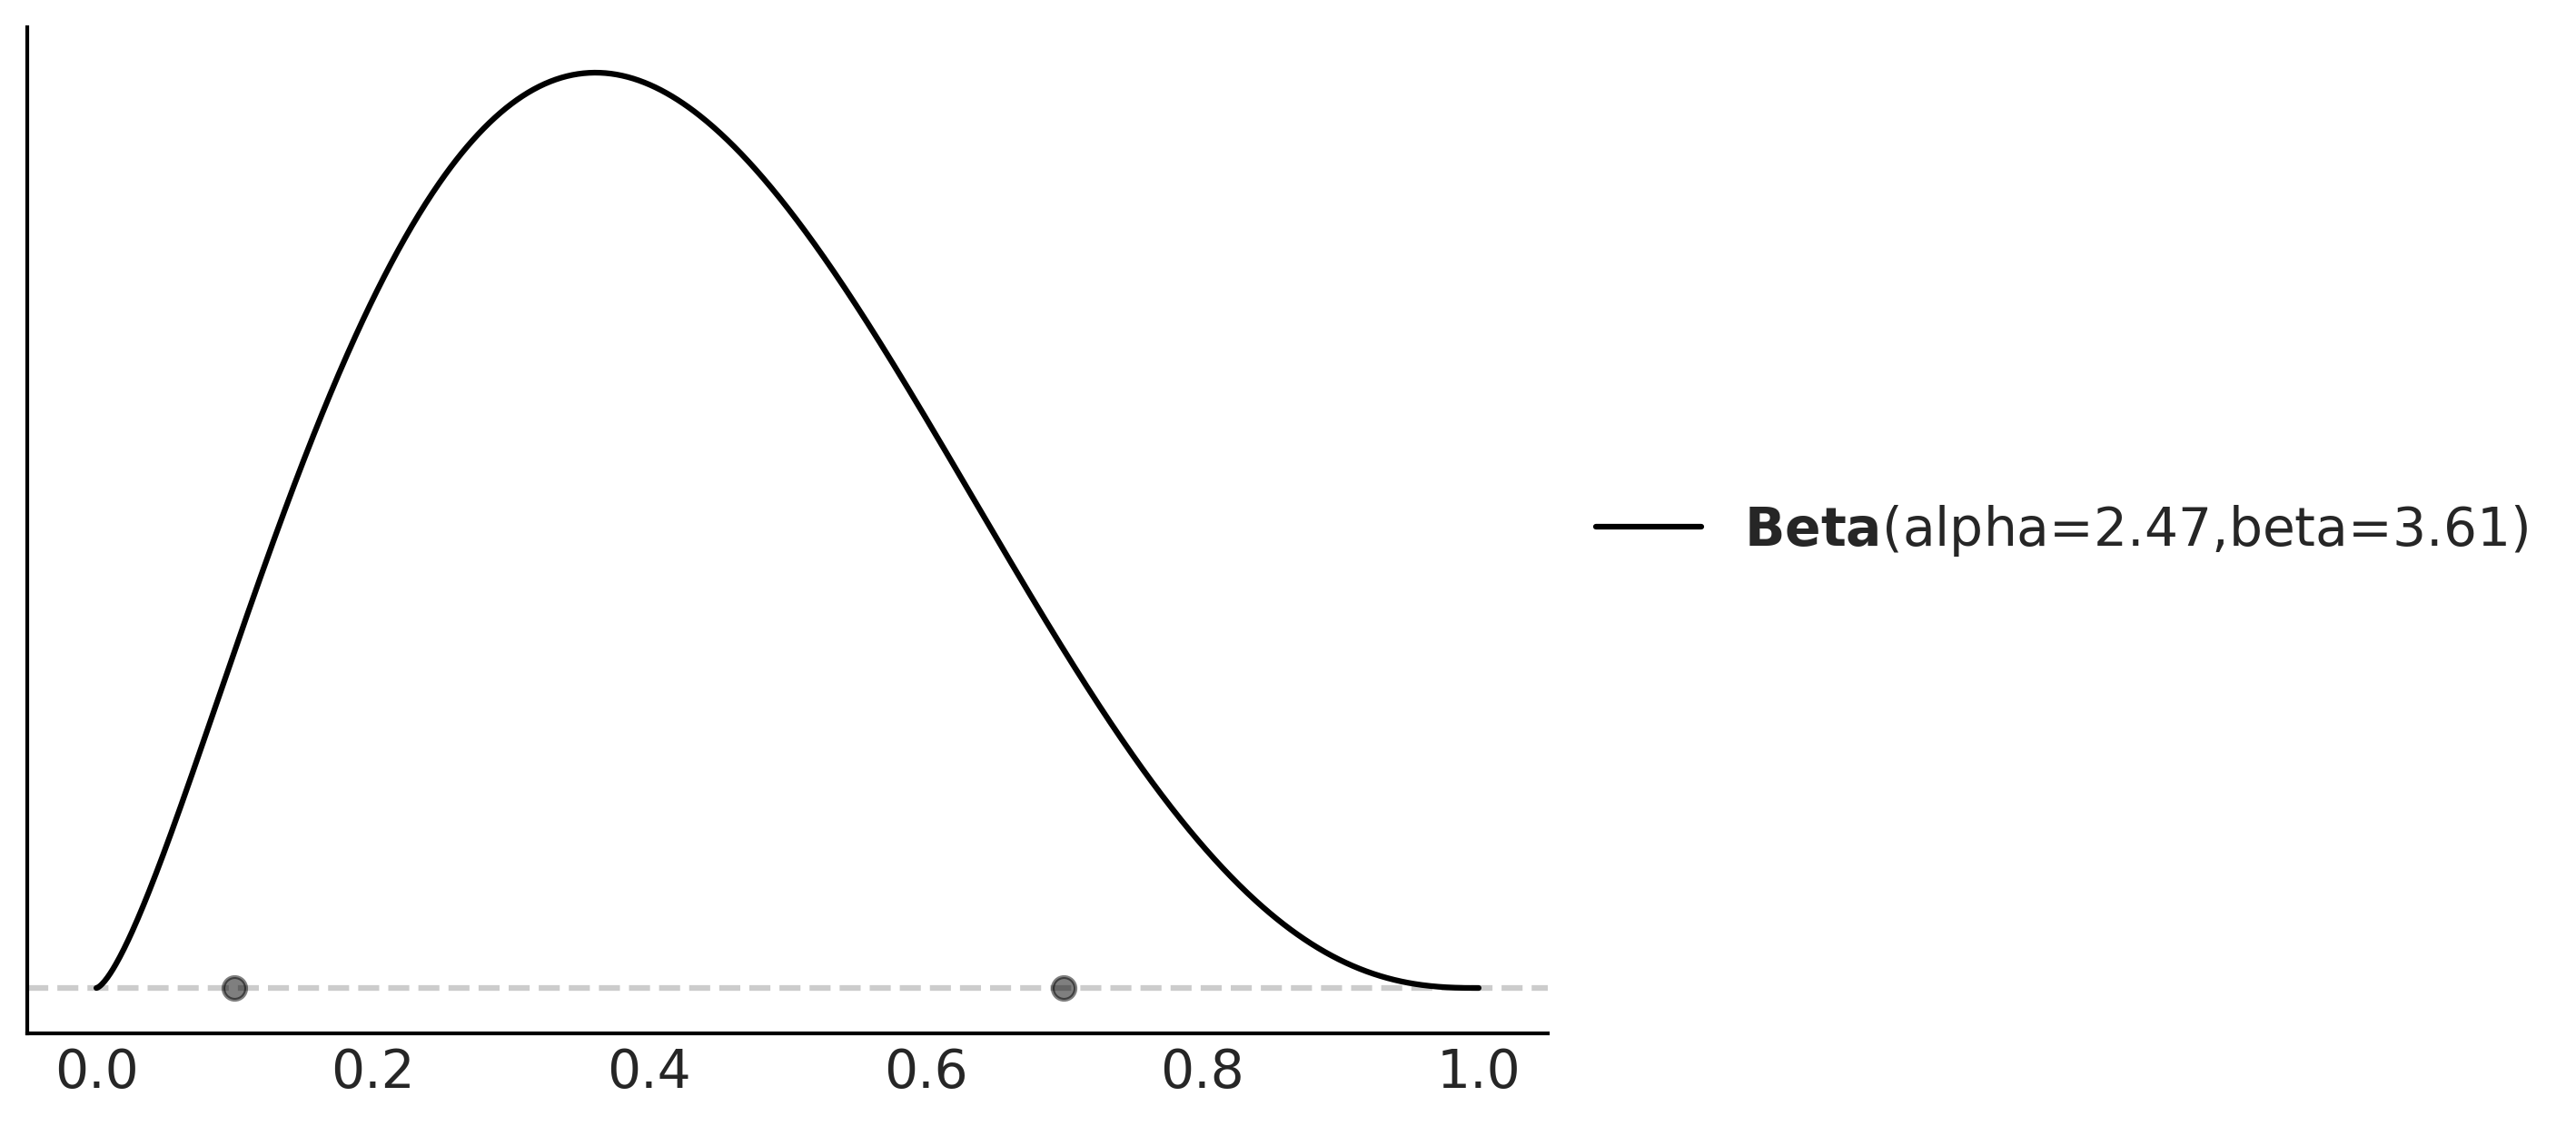

In [22]:
dist = pz.Beta()
pz.maxent(dist, 0.1, 0.7, 0.9)
plt.savefig("../fig/maxent_beta.png")